**Máster Universitario en Big Data Science**


---


Prácticas Clase Regresión Lineal Múltiple

---

Profesora: Montserrat-Ana Miranda Galcerán

Universidad de Navarra, Instituto de Ciencia de los Datos e Inteligencia Artificial (DATAI), Campus Universitario, 31080, Pamplona, Spain.

                                   Fecha última modificación: 25-11-22

# Introducción

**N.B.** Las librerías de Python se irán importando en orden a medida que se vayan introduciendo los distintos pasos.

El objetivo de este NoteBook es construir un modelo de Regresión Lineal Multivariable (RLM) donde evaluaremos cada una de las secciones de la presentación:

1. Las técnicas de estimación de los parámetros.
2. Métricas para la validación del modelo.
3. Análisis univariante e intervalos de confianza.
4. Técnicas de selección de variables.
5. VIF (Variance Inflation Factor)
6. Técnicas de regularización: Rigde y Lasso.






# Conexión con Google Drive




---

Se nos indicará: "Selecciona una cuenta para ir a Google Drive for desktop" en una nueva ventana (Go to this URL in a browser) una vez hemos seleccionado nuestra cuenta se nos dará el código de acceso, sólo hay que copiarlo e introducirlo en la casilla: **Enter your authorization code".

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Base de datos 


Trabajaremos con la base de datos libre *Boston housing prices* de [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html).








**DESCRIPCIÓN DE LAS VARIABLES DEL DATASET BOSTON HOUSING PRICES:**

* CRIM: Per capita crime rate by town
* ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
* INDUS: Proportion of non-retail business acres per town
* NOX: Nitric oxide concentration (parts per 10 million)
* RM: Average number of rooms per dwelling
* AGE: Proportion of owner-occupied units built prior to 1940
* DIS: Weighted distances to five Boston employment centers
* RAD: Index of accessibility to radial highways
* TAX: full-value property-tax rate per \$10,000
* PTRATIO: Pupil-teacher ratio by town
* B: $1000(B_k — 0.63)^2$, where Bk is the proportion of [people of African American descent] by town
* LSTAT: Percentage of lower status of the population
* MEDV: Median value of owner-occupied homes in \$ $10^3$


---

MEDV es la variable respuesta u objetivo de este problema de regresión  lineal.

# Librerías generales


---
Importamos a continuación las librerías siguientes:

* La librería **Pandas** que nos permitirá trabajar con tablas de datos.
* La librería **Numpy**. Esta librería la utilizaremos cuando sea necesario contruir tuplas (vectores), matrices o realizar operaciones complejas.

* La librería **Math**. Esta librería la utilizaremos para calcular la raíz cuadrada en una de las métricas (Mean Squared Error, MSE).


In [1]:
import pandas as pd
import numpy as np
import math #Necesitamos importar la función math para poder calcular la raíz cuadrada de MSE.

Importamos las librerías gráficas:

Estas librerías son las necesitaremos en la segunda parte de limpieza de datos:
- **Matplotlib**
- **Seaborn**

In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns   #seaborn es una extensión de matplotlib
sns.set() #restablece la configuración de valores predeterminados

# Carga y lectura de datos 






En esta celda se cargaría el fichero completo con la variable respuesta incluida.

In [3]:
# from google.colab import files
# files.upload()

Leeremos el fichero de datos para convertirlo en *dataframe*:

In [4]:
#para que funcione esta instrucción es necesario cargar antes los datos
df = pd.read_csv('Bostonraw.csv') 

Para este *dataframe* vamos a seguir un orden estándar para leerlo y caracterizarlo de manera rápida antes del preprocesamiento de los datos:


1. Conocer las dimensiones del *dataframe*: **print(df)**, **df.shape**.
2. Conocer el encabezado del *dataframe*: **df.head()**.
3. Conocer la denominación de las columnas (variables): **df.columns**
4. Acceso a los distintos tipos de variables asignadas por columna: **df.info()**
5. Acceso a la información resumida de la estadísitica de cada columna: **df.describe()**


In [9]:
df.shape

(506, 13)

In [10]:
df.columns = map(str.lower, df.columns) #convertimos las variables a minúsculas

In [11]:
df.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
df.columns

Index(['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   nox      506 non-null    float64
 4   rm       506 non-null    float64
 5   age      506 non-null    float64
 6   dis      506 non-null    float64
 7   rad      506 non-null    float64
 8   tax      506 non-null    float64
 9   ptratio  506 non-null    float64
 10  b        506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(13)
memory usage: 55.3 KB


In [14]:
df.describe()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Limpieza y preprocesamiento

                                Identificación de valores nulos y valores atípicos



---

> * Mediante la siguiente instrucción df.isnull comprobaremos que no tenemos valores nulos.
>
> * Notar que como no tenemos variables categóricas (ha sido comprobado anteriormente a partir de la instrucción df.info()) no tenemos que evaluar problemas de valores incorrectamente clasificados asociados a este tipo de variables.
>
> * Mediante el diagrama de cajas evaluaremos la existencia de valores atípicos o outliers para determinar qué variables presentan una dispersión de valores que se aleja de una distribución normal o gaussiana. Esto nos permitirá decidirnos por el tipo de estandarización más adecuada para nuestras variables.  Para problemas de regresión la estandarización es el procedimiento más habitual pero para que la estandarización sea exitosa es indispensable filtrar primero los valores atípicos (o *outliers*). Previamente a la regresión lineal, utilizaremos la librería **StandardScaler** que nos permitirá trabajar con las variables estadarizadas.


In [15]:
df.isnull().sum()

crim       0
zn         0
indus      0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

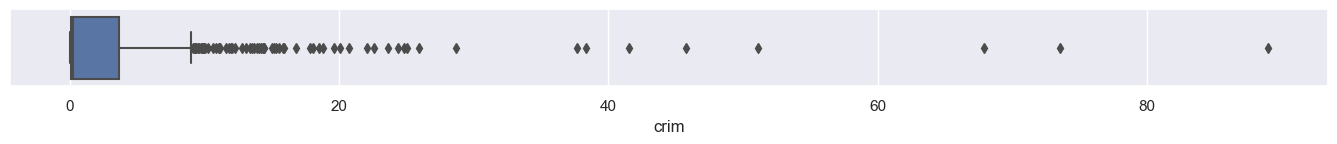

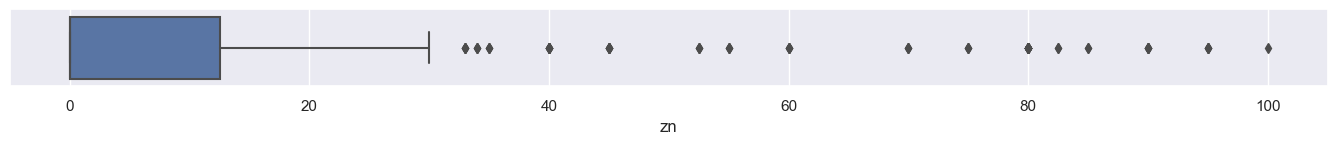

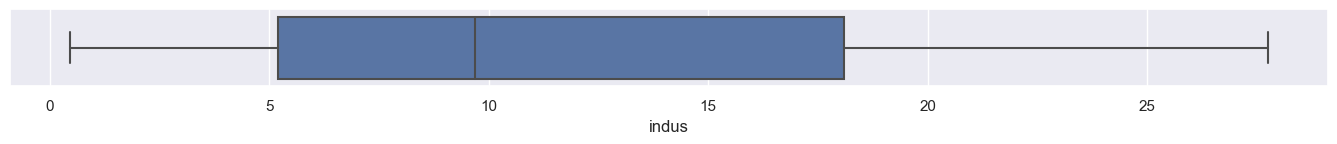

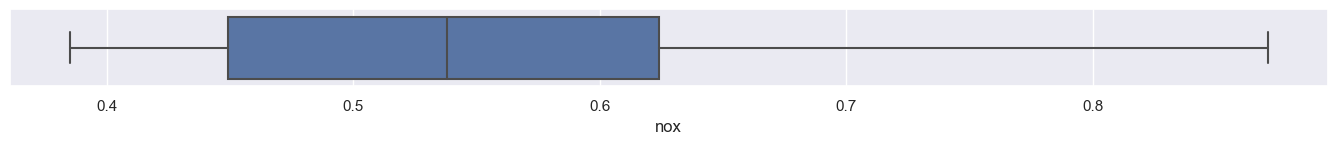

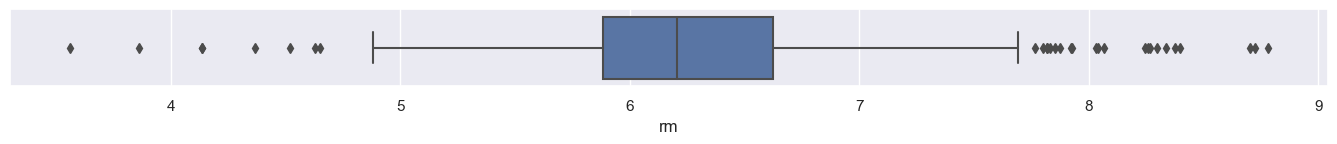

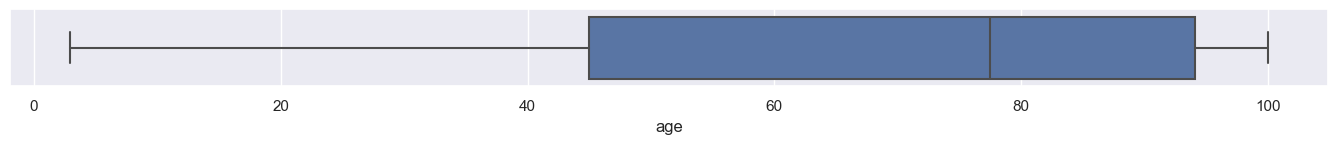

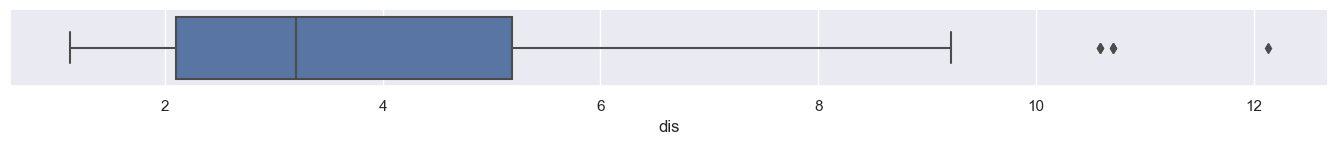

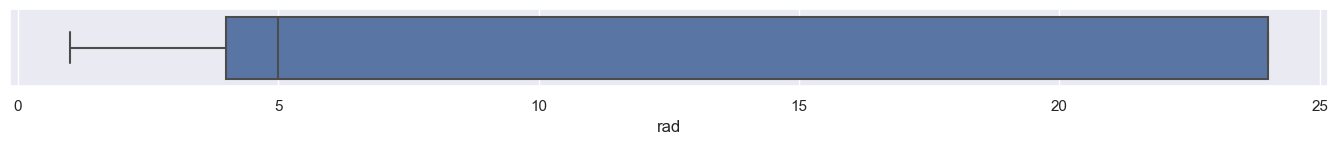

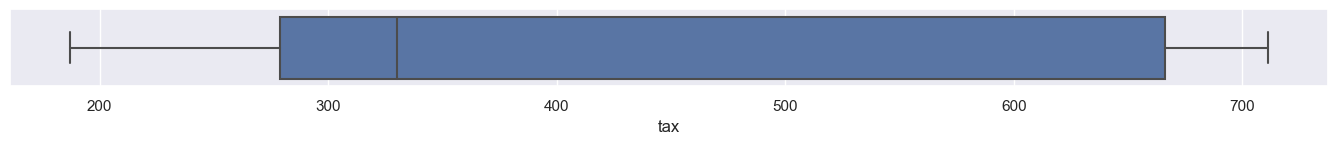

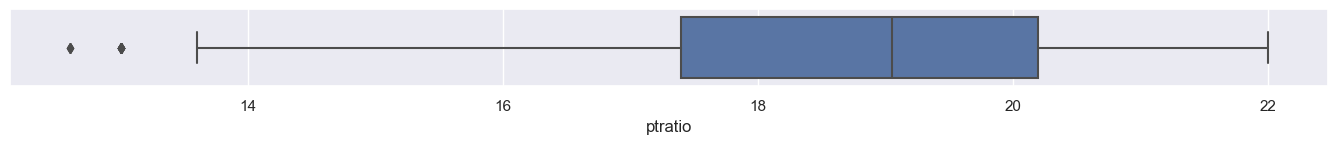

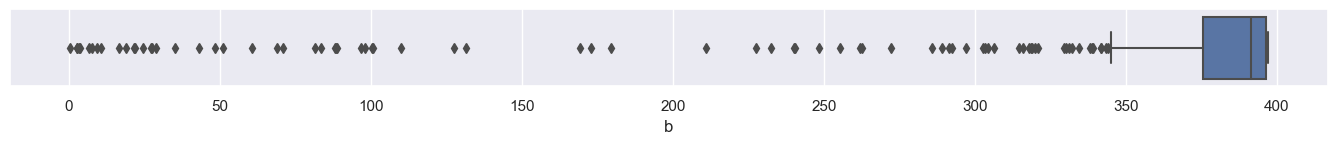

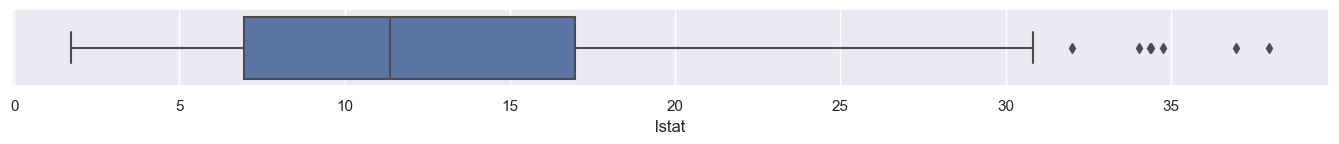

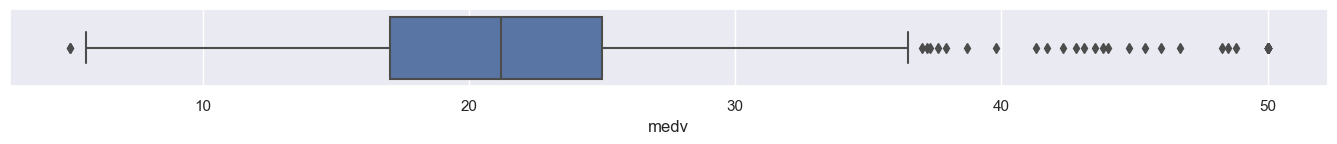

In [16]:
for column in df:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df, x=column)

Utilizaremos la función [copy() de Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html) para crear un *dataframe* copia de df donde más adelante guarderemos los datos estandarizados.

De esta manera los cambios en los valores del nuevo dataframe dfestand no serverán reflejados en el dataframe original df.


      Aplicaremos el método del intervalo intercuartílico para filtrar los valores atípicos de las variables del problema
                   

---


A continuación filtraremos los valores atípicos de cada una de las variables:
* Variables predictoras (**X**): 
* Variable respuesta (**Y**): 'medv'.


In [17]:
#definción de la función que nos permitirá eliminar los outliers 
#para cada variable (columna)
def eliminar_outlier(col): 
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lowerthr= Q1-(1.5 * IQR) #UMBRAL INFERIOR
    upperthr= Q3+(1.5 * IQR) #UMBRAL SUPERIOR
    return lowerthr,upperthr

In [18]:
for column in df.columns: #aplicamos la función eliminar_outlier para cada variable (columna) del dataframe
    if df[column].dtype != 'object': 
        lowerthr,upperthr=eliminar_outlier(df[column])
        df[column]=np.where(df[column]>upperthr,upperthr,df[column])
        df[column]=np.where(df[column]<lowerthr,lowerthr,df[column])

Comprobamos gráficamente que se ha efectuado el proceso de filtrado correctamente:

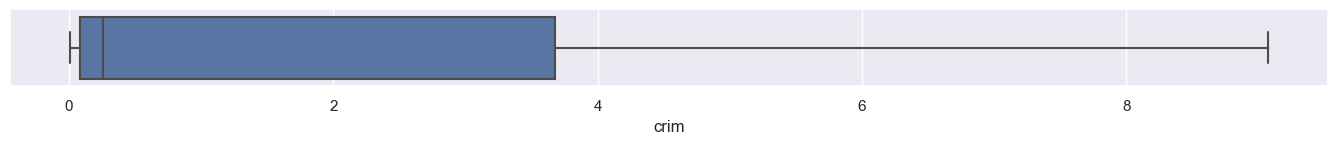

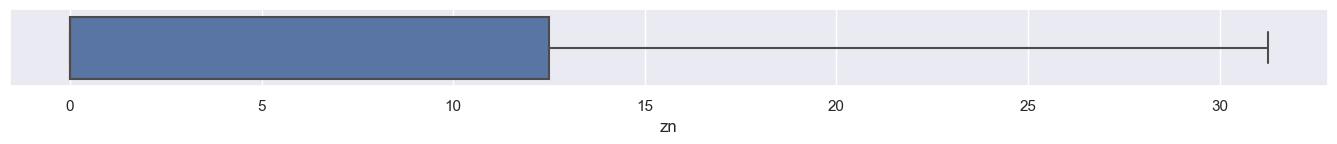

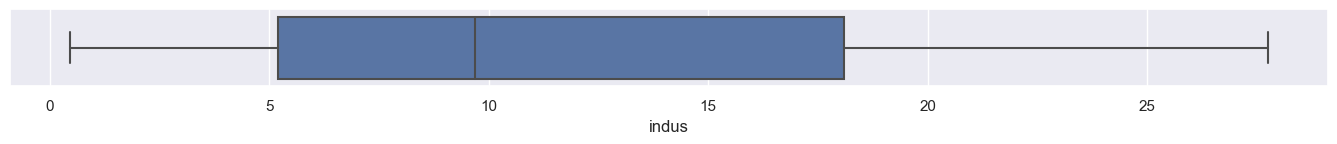

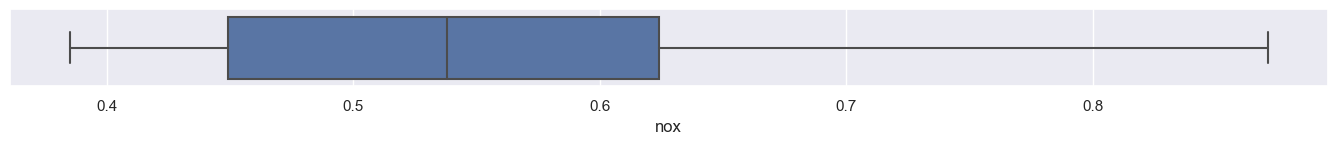

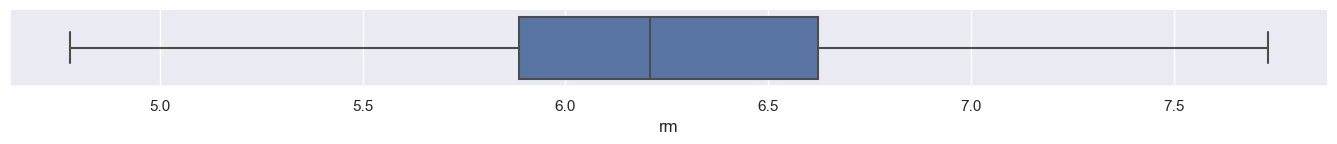

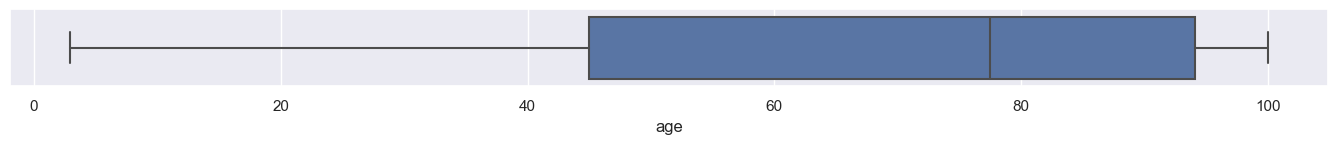

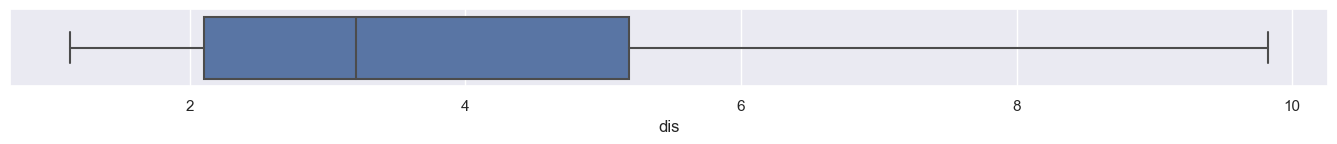

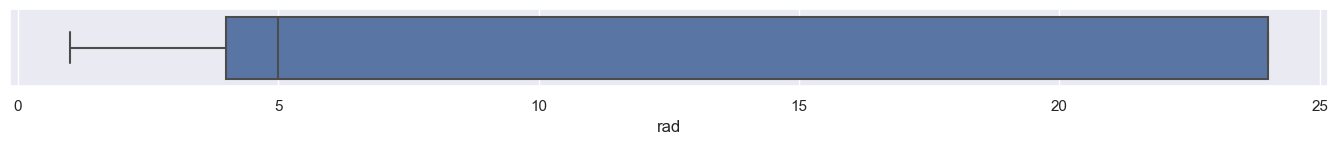

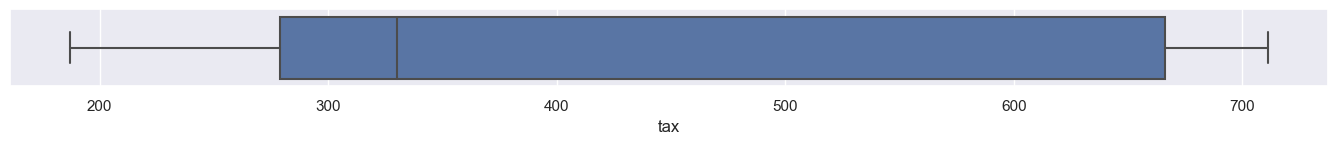

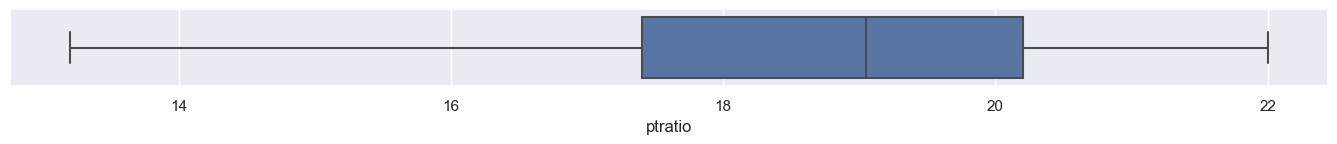

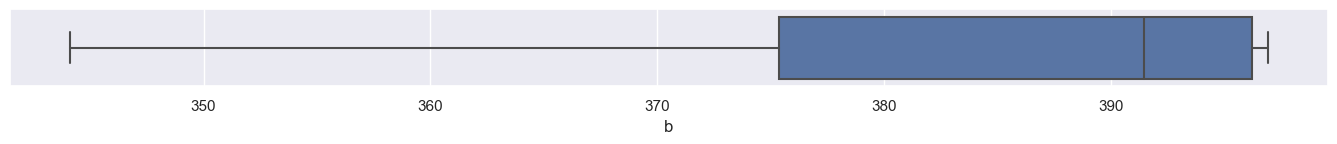

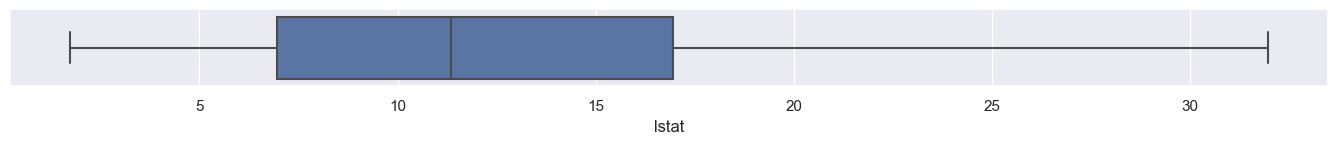

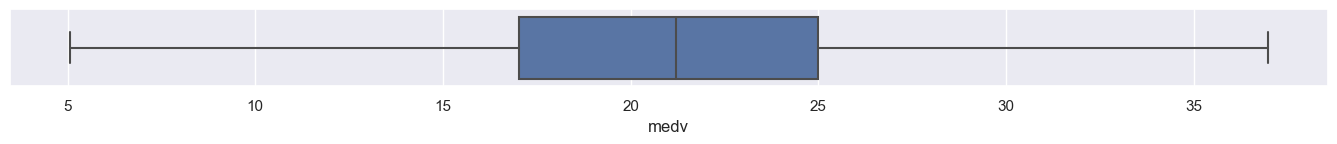

In [19]:
for column in df:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df, x=column)

Haremos una copia del fichero de datos filtrado *df* que denominaremos dfestand porque es donde realizaremos el proceso de estandarización de los datos.

In [20]:
dfestand=df.copy()

#### Estandarización de los datos 



---

Previamente a la creación de las muestras de entrenamiento y de test es necesario realizar la estandarización de todas las variables.



---

A continuación, al tratarse de un problema de regresión multivariable (con más de una variable predictoras) necesitamos eliminar el efecto de escala asociado a las distintas unidades de medida de cada una de las variables. 

Con este objetivo, y en la misma línea de la estandarización que vimos en el módulo 4 donde asumíamos que la distribución de frecuencias de nuestras variables seguía una distribución normal (o gaussiana).

Para la estandarización calculábamos los nuevos valores $X^*$ a partir de:

$X^* = \dfrac{X-mean(X)}{SD(X)}$

donde SD(X) representa la desviación estándar y mean(X) es el valor medio o esperanza.


En esta [página](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#robustscaler) de la librería sklearn podemos ver la comparación entre distintas funciones para estandarizar, normalizar o realizar una transformación Box-Cox de los datos.

Estandarizamos las variables predictoras o atributos (variables independientes, **X**)

In [21]:
dfestand.columns

Index(['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [22]:
from sklearn.preprocessing import StandardScaler #importamos la librería para estandarizar
scalerX = StandardScaler()
lista_columnas=['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat']
dfestand[lista_columnas] = scalerX.fit_transform(dfestand[lista_columnas])

Estandarizamos la variable respuesta u objetivo (variable dependiente, **Y**)

In [23]:
scalerY = StandardScaler()
dfestand['medv']=scalerY.fit_transform(np.array(dfestand['medv']).reshape(len(dfestand['medv']),1)).reshape(len(dfestand['medv']))

### Condiciones de normalidad (Q-Q plot)

Test de normalidad de los residuos de las variables predictoras y la variable respuesta.

Representación cuantil-cuantil seleccionando una distribución normal (default) en [statsmodel](https://www.statsmodels.org/dev/generated/statsmodels.graphics.gofplots.qqplot.html).

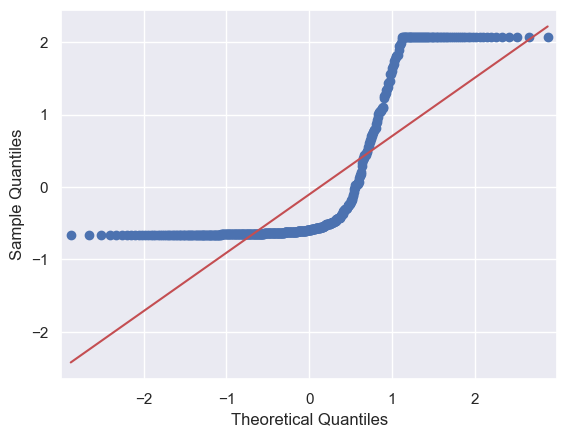

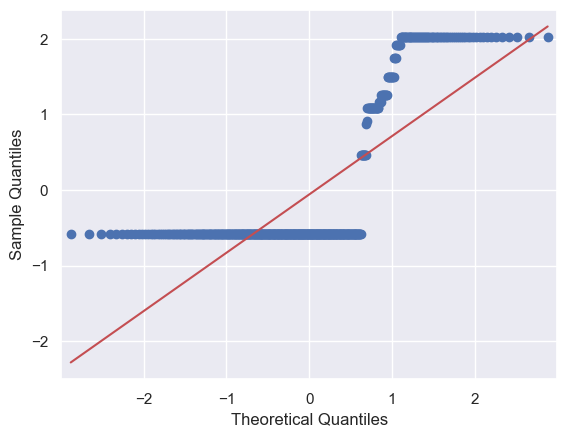

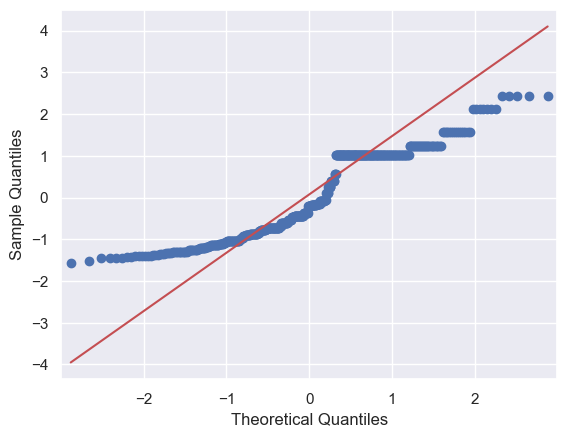

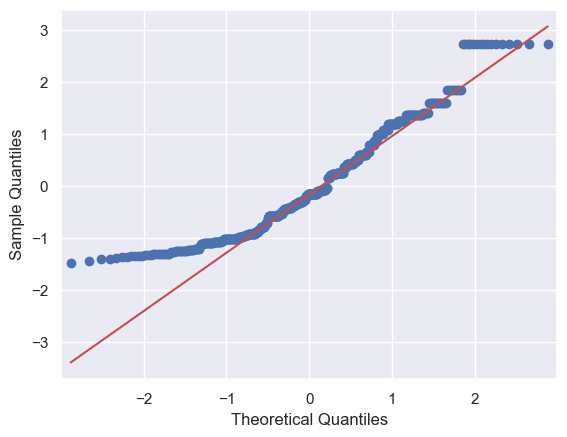

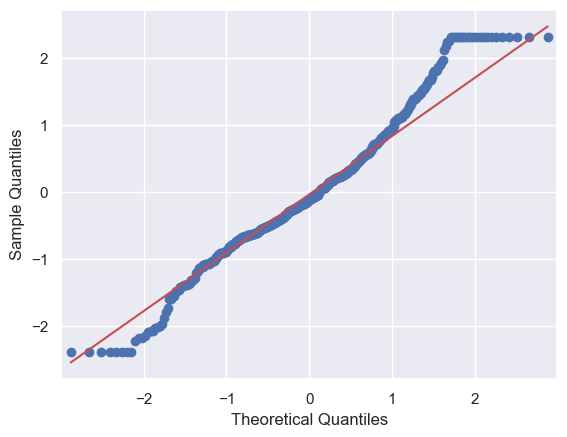

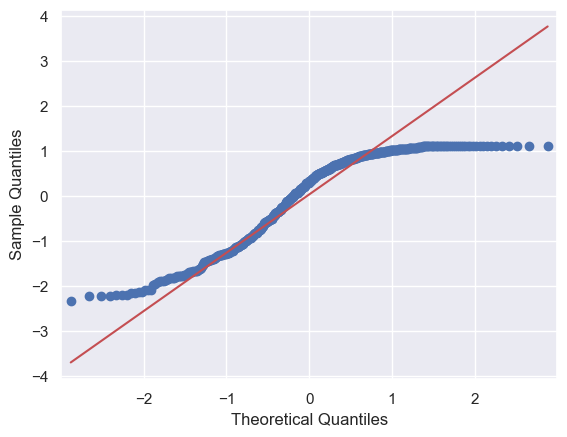

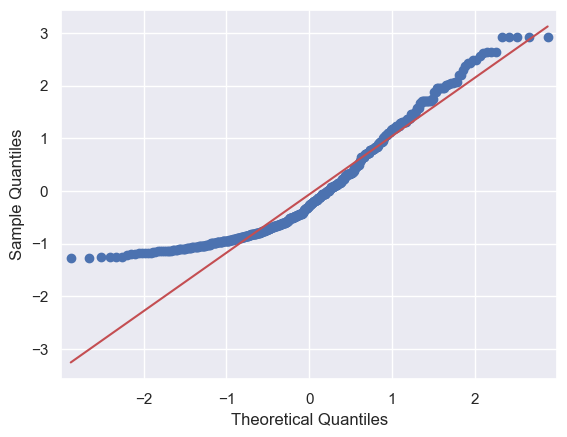

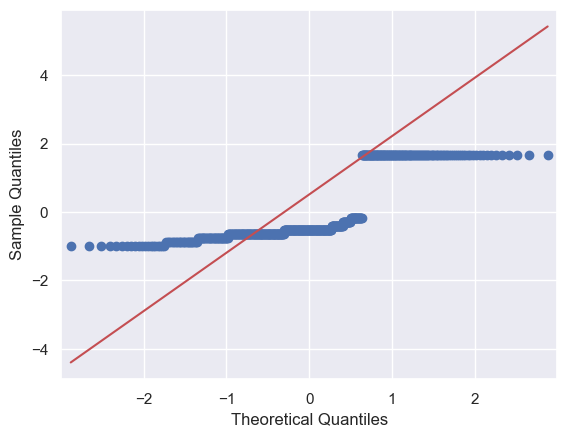

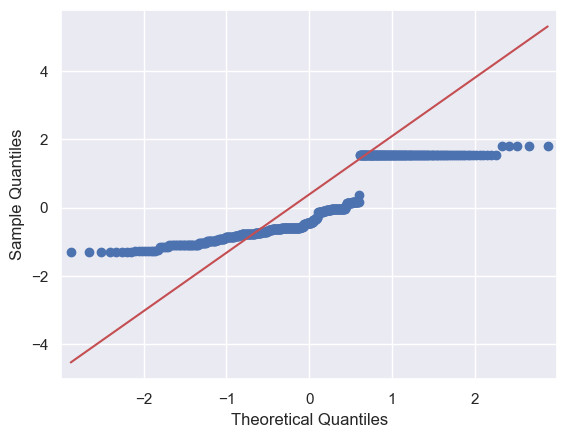

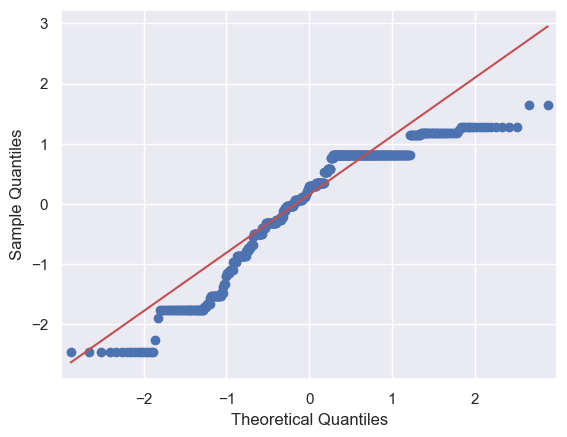

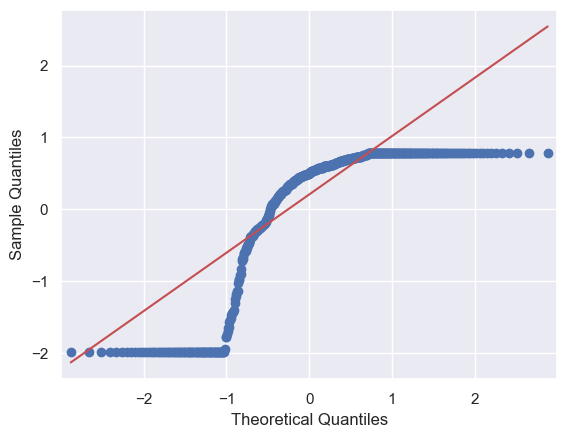

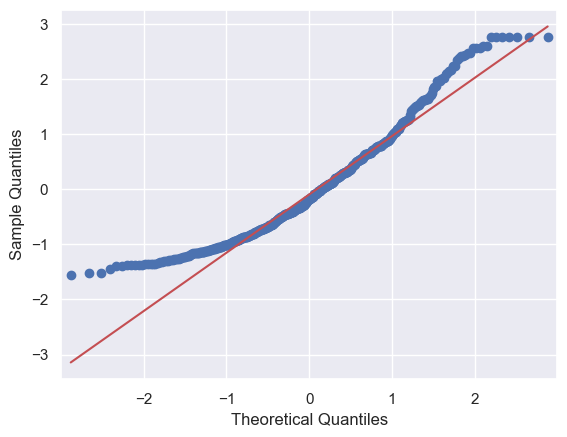

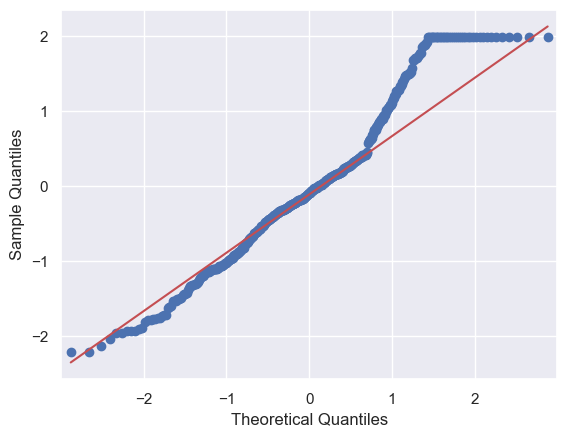

In [24]:
import statsmodels.api as sm
#A partir de las variables predictoras estandarizadas
sm.qqplot(dfestand['crim'], line='q')
sm.qqplot(dfestand['zn'], line='q')
sm.qqplot(dfestand['indus'], line='q')
sm.qqplot(dfestand['nox'], line='q')
sm.qqplot(dfestand['rm'], line='q')
sm.qqplot(dfestand['age'], line='q')
sm.qqplot(dfestand['dis'], line='q')
sm.qqplot(dfestand['rad'], line='q')
sm.qqplot(dfestand['tax'], line='q')
sm.qqplot(dfestand['ptratio'], line='q')
sm.qqplot(dfestand['b'], line='q')
sm.qqplot(dfestand['lstat'], line='q')
sm.qqplot(dfestand['medv'], line='q')
plt.show()

# LinearRegression de Scikit Learn



Asumimos la hipótesis de normalidad de las variables.



---

Recordemos que el modelo lo construimos a partir de los datos de una muestra de entrenamiento.  Para ello, tendremos que importar las siguientes funciones:
1. La función de sklearn que nos permitirán crear las muestras de entrenamiento y de test a partir de la muestra original ([**train_test_split**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)) haciendo una selección aleatoria de los registros del *dataset* de partida.
2. La función de sklearn que permitirán hacer la regresión ([**LinearRegression**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)) para construir el modelo y medir la capacidad predictiva del modelo **sklearn.metrics**).


                                   Variables predictoras (X) y variable respuesta (Y)



---

A partir del *dataframe* `dfestand` vamos a asignar el conjunto de variables independientes a **X** y la variable dependiente a **Y**.


In [25]:
X = dfestand.drop(['medv'],axis=1).values
Y = dfestand['medv'].values

#### Creación de las muestras de entrenamiento y de test<a name="muestras"></a> 



---



Necesitaremos importar la función **train_test_split** que nos permitirá crear las muestras de entrenamiento (*train*) y test a partir de las variables independientes X y la variable dependiente Y que hemos definido previamente.



---


Esta función **train_test_split** nos permite hacer una selección aleatoria de las muestras de entrenamiento y test en una proporción 70/30 mediante el argumento *test_size=0.3*.

In [26]:
from sklearn.model_selection import train_test_split #importamos la función para construir las muestras de entrenamiento y de test.
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=0,test_size=0.3)

In [27]:
[X_train.shape, Y_train.shape] #comprobamos las dimensiones de la muestra de entrenamiento


[(354, 12), (354,)]

In [28]:
[X_test.shape, Y_test.shape] #comprobamos las dimensiones de la muestra de test

[(152, 12), (152,)]

#### Construcción del modelo<a name="modelo"></a> 






---

En nuestro modelo de regresión lineal tenemos que la variable dependiente $Y$ (precio de la vivienda) es una función lineal de cuatro variables independientes $X_i$ ($i=1,\ldots,4$) ( ingresos, antiguedad, numhabitaciones, poblacion) de tal forma que la expresión:

 $Y = a_1 * X_1 + a_2 * X_2 + a_3 * X_3 + a_4 * X_4 + b$

 donde $a_i$ ($i=1,\ldots,4$) y $b$ son los parámetros o coeficientes del ajuste lineal. $b$ es el parámetro de la variable constante $X_0=1$ (en inglés *intercept*).

También se puede escribir como:

 $Y = a_1 * \text{ingresos} + a_2 *\text{antiguedad}+ a_3 * \text{numhabitaciones} + a_4 * \text{poblacion} + b$


---

- Los coeficientes del ajuste $a_i$ los determinamos mediante la función **lr.coef_**
- El término independiente $b$ lo determinamos mediante la función **lr.intercept_**





In [29]:
from sklearn.linear_model import LinearRegression #Importamos la función regresión lineal
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error #Importamos la función MSE
#Obtención del modelo de regresión lineal para la muestra de entrenamiento
lr= LinearRegression() 
lr.fit(X_train, Y_train) #construcción del modelo a partir de los datos de entrenamiento.
#Cálculo de los valores predichos a partir de la muestra de entrenamiento
Y_train_pred= lr.predict(X_train)
#Cálculo de los valores predichos a partir de la muestra de test
Y_test_pred= lr.predict(X_test)

In [30]:
parametroslr=lr.coef_
parametroslr

array([-0.35407688,  0.04647954, -0.01484735, -0.17859142,  0.2739858 ,
       -0.05973401, -0.30130319,  0.40005959, -0.20239196, -0.24906454,
        0.01038564, -0.37734601])

In [31]:
lr.intercept_ #lr.intercept es prácticamente cero ya que hemos estandarizado todas las variables por lo que la función de distribución de todas ellas se encuentra centrada en el origen.

-0.005834026652891119

Evaluación del modelo:

* Por lo tanto, el modelo lineal que hemos construido a partir de los valores estandarizados de las variables independientes y dependiente se escribe como:

$Y = \theta_0 + \sum_{m=1}^{13} \theta_i x_i $

con $x_i=\{'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax','ptratio', 'b', 'lstat'\}$

 y con $Y=medv$








                                Revertimos la estandarización de los datos

En cualquier momento se pueden recuperar los valores predichos de la variable objetivo invirtiendo la estandarización mediante la función **inverse_transform()**:



Y_test_pred_inv = scalerY.inverse_transform(Y_test_pred)



Más información sobre la función que nos permite hallar los valores inversos de la estandarización [pinchar aquí](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.inverse_transform)



In [32]:
Y_test_pred2D= Y_test_pred.reshape(-1,1) # debemos hacer esta transformación de un array 1D a uno 2D para poder ejecutar inverse_tranform
Y_test_pred_inv = scalerY.inverse_transform(Y_test_pred2D)
print(Y_test_pred_inv)

[[25.42881381]
 [19.60521255]
 [26.1104816 ]
 [11.42752578]
 [21.90213364]
 [19.61239477]
 [20.44626807]
 [21.93752372]
 [17.95974134]
 [22.17371123]
 [12.85986124]
 [16.19354898]
 [16.59127371]
 [ 6.17661994]
 [33.66540418]
 [30.54940511]
 [21.19452033]
 [32.53023055]
 [30.30708431]
 [23.54692915]
 [24.7970257 ]
 [22.48276427]
 [20.75884822]
 [29.01782387]
 [22.61375569]
 [12.83090549]
 [17.66917299]
 [18.20834941]
 [32.24568203]
 [21.05413736]
 [15.22762905]
 [16.59275142]
 [20.64126132]
 [23.98710213]
 [28.07395432]
 [17.76935573]
 [10.73584023]
 [19.09805942]
 [16.90049486]
 [14.99785533]
 [26.15613446]
 [21.34086754]
 [23.10741286]
 [13.47414175]
 [23.07337761]
 [24.43892208]
 [20.48296437]
 [20.36859464]
 [10.0492712 ]
 [24.02661365]
 [18.98261238]
 [18.96582429]
 [24.5355492 ]
 [28.46279205]
 [14.35556432]
 [22.4460598 ]
 [20.84102224]
 [16.98483654]
 [17.88807032]
 [19.83007163]
 [19.16306054]
 [21.65596591]
 [32.17387846]
 [30.8159357 ]
 [15.39663378]
 [31.13898372]
 [18.36200

## Evaluación de la bondad del ajuste
  
Las métricas son medidas de la bondad del ajuste, es decir, nos dicen cuán bien el modelo de regresión lineal se ajusta a las observaciones.

$\bullet$ MAE es el **error absoluto medio** (*Mean Absolute Error*) y se calcula como el promedio del valor absoluto de la diferencia entre los valores predichos y los valores observados.

$$MAE = \dfrac{1}{n}\sum\limits_{i=1}^n |Y(i)-Y_{pred}(i))|$$

$\bullet$ MSE es el **error cuadrático medio** (*Mean Square Error*) que se calcula a partir de los errores de aproximación o residuos como:


$$MSE = \dfrac{1}{n}\sum\limits_{i=1}^n (Y(i)-Y_{pred}(i)) ^2 $$


$\bullet$ RMSE es el **error estándar de la estimación** (*Root Mean Square Error*). Es una de las métricas más importantes en regresión y se calcula tomando la raíz cuadrada del error cuadrático medio por lo que recupera las mismas dimensiones que la variable objetivo o respuesta: 

$RMSE = \sqrt{MSE}$

El error estándar de la estimación es una medida de la precisión de los estimadores ($\theta_0$, $\theta_1$) obtenidos en la regresión.

$\bullet$ $R^2$ es el **coeficiente de determinación** que nos indica la proporción de la información de los datos que se explican por el modelo:


$$R^2= 1 - \dfrac{RSS}{TSS} \; \; ; \; \; \text{con} \; \; R^2 \in [0,1] $$

Donde RSS se corresponde con la suma del cuadrado de los residuos (*Residual Sum of Squares*):

$$RSS = \sum\limits_{i=1}^n (Y(i)-Y_{pred}(i))^2$$

y TSS representa la variabilidad total en $R^2$ o varianza de la variable respuesta (*Total Sum of Squares*):

$$TSS = \sum\limits_{i=1}^n (Y(i)-\overline{Y})^2$$

$\overline{Y}$ representa el valor medio de Y.



---

* A la métrica RSS (*Residual Sum of Squares*) también la encontraremos con las siglas SSE ({*Sum of Squares Error*).
* A la métrica TSS (*Total Sum of Squares*) también la encontraremos con las siglas SST (*Sum of Squares Total*).



Definimos la función *calculametricas* con las métricas de la regresión:

In [166]:
def calculametricas(y_test, y_pred):
    mae = metrics.mean_absolute_error(y_test, y_pred) #Error absoluto medio (MAE)
    mse = metrics.mean_squared_error(y_test, y_pred) #Error cuadrático medio (MSE)
    rmse = math.sqrt(mse) #Error estándar de la estimación (RMSE)
    r2 = metrics.r2_score(y_test, y_pred) #Cálculo del coeficiente de determinación R2
    print("MAE : ",mae)
    print("MSE : ",mse)
    print("RMSE : ",rmse)
    print("R2 : ",r2)
    return mae,mse,rmse,r2
def calculametricas2(y_test, y_pred):
    mae = metrics.mean_absolute_error(y_test, y_pred) #Error absoluto medio (MAE)
    mse = metrics.mean_squared_error(y_test, y_pred) #Error cuadrático medio (MSE)
    rmse = math.sqrt(mse) #Error estándar de la estimación (RMSE)
    r2 = metrics.r2_score(y_test, y_pred) #Cálculo del coeficiente de determinación R2
    # print("MAE : ",mae)
    # print("MSE : ",mse)
    # print("RMSE : ",rmse)
    # print("R2 : ",r2)
    return mae,mse,rmse,r2

In [34]:
print('Métricas calculadas sobre la muestra de entrenamiento:')
metricasLR_train=calculametricas(Y_train, Y_train_pred)

Métricas calculadas sobre la muestra de entrenamiento:
MAE :  0.32142687388174335
MSE :  0.18389294151113492
RMSE :  0.4288274029386822
R2 :  0.8170186639244734


In [35]:
print('Métricas calculadas sobre la muestra de test:')
metricasLR_test=calculametricas(Y_test, Y_test_pred)

Métricas calculadas sobre la muestra de test:
MAE :  0.398199475412768
MSE :  0.2958698143986027
RMSE :  0.54393916424413
R2 :  0.6989577528641


### Estudio comparativo de las métricas de ensayo y test



---

Esta tabla nos permite evaluar si existe un sobreajuste, es decir, si el modelo se ajusta muy bien a los datos de entrenamiento pero no tan bien a datos nuevos (test).

In [36]:
dfmetricasLR_train=pd.DataFrame(metricasLR_train).rename(columns = {0:'train'})
dfmetricasLR_test=pd.DataFrame(metricasLR_test).rename(columns = {0:'test'})
dfmetricasLR_traintest=pd.concat([dfmetricasLR_train,dfmetricasLR_test], axis=1, ignore_index=True)
dfmetricasLR_traintest = dfmetricasLR_traintest.rename(columns = {0:'train',1:'test'},index={0: 'MAE',1:'MSE',2:'RMSE',3:'R2'})
dfmetricasLR_traintest

,train,test
MAE,0.321427,0.398199
MSE,0.183893,0.295870
RMSE,0.428827,0.543939
R2,0.817019,0.698958


**Pregunta**: ¿Existe sobreentrenamiento (o sobreajuste)?

## Visualización e interpretación de los resultados<a name="interpretacion"></a> 








---

A continuación vamos a representar el diagrama de dispersión de los valores predichos frente a los valores reales: 

1. Con los valores estandarizados.
2. Con los valores originales.



---
* Recordemos que los *residuos* se calculan como la diferencia entre los valores de la variable respuesta (Y_test) y los valores predichos por el modelo (Y_test_pred). 

* Utilizamos la muestra de ensayo (*test*) ya que es con esta muestra que ponemos a prueba el modelo que hemos hallado con la muestra de entrenamiento (*train*).


### Diagrama de dispersión de los valores predichos frente a los valores reales (estandarizados)



---

Nos permite descubrir si los valores predichos se ajustan bien a los valores reales, por tanto, si los valores se ordenan de acuerdo con una relación lineal (entorno a una recta) quiere decir que el modelo es bueno. El valor del coeficiente de determinación para la muestra de entrenamiento $R^2 \approx 0.82$ y en la muestra de test  $R^2 \approx 0.70$ . En la gráfica que obtenemos a continuación podemos comprobar visualmente que el ajuste es bastante bueno.


In [37]:
sY_test = pd.Series(Y_test)
sY_test.name = 'Y_test'

In [38]:
sY_test_pred= pd.Series(Y_test_pred)
sY_test_pred.name = 'Y_test_pred'

In [39]:
dfYs = pd.concat([sY_test, sY_test_pred], axis=1)
dfYs.head()

,Y_test,Y_test_pred
0,0.095179,0.467613
1,1.986111,-0.299108
2,0.147842,0.557360
3,-1.787525,-1.375763
4,-0.089142,0.003299


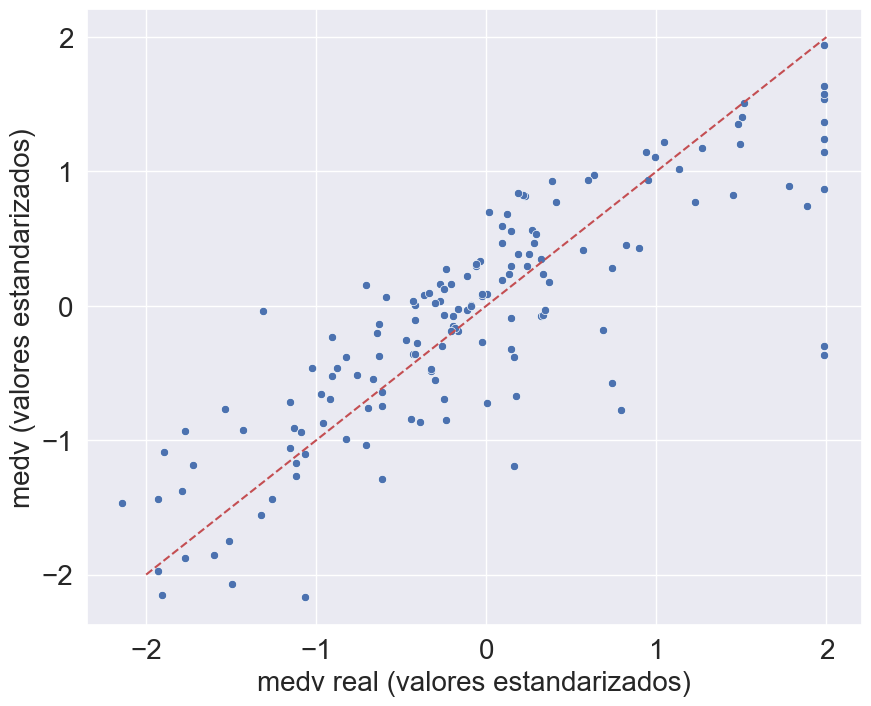

In [40]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=dfYs, x="Y_test", y="Y_test_pred",color="b")
#--------------------código para el diseño del gráfico---------------------------------
plt.xlabel('medv real (valores estandarizados)', fontsize='20')
plt.ylabel('medv (valores estandarizados)', fontsize='20')
plt.plot([-2,2],[-2,2],'--r')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

### Diagrama de dispersión de los valores predichos frente a los valores reales (en las unidades de origen)



---

Nos permite descubrir si los valores predichos se ajustan bien a los valores reales, por tanto, si los valores se ordenan de acuerdo con una relación lineal (entorno a una recta) quiere decir que el modelo es bueno. Cuantitativamente $R^2 \approx 0.82$. En la gráfica que obtenemos a continuación podemos comprobar visualmente que el ajuste es bastante bueno.

Si queremos visualizar los valores predichos frente a los reales en las unidades originales habría que invertir la transformación de los datos reales también que tenemos en la muestra de test mediante la función **inverse_transform()**.

Se vuelve a mostrar aquí el procedimiento para hallar la transformación inversa tanto de la variable predicha como de la real para obtener respectivamente los valores en las unidades originales: 
> Y_test_pred_inv 

> Y_test_inv





In [41]:
Y_test_pred2D= Y_test_pred.reshape(-1,1) # debemos hacer esta transformación de un array 1D a uno 2D para poder ejecutar inverse_tranform

In [42]:
Y_test_pred_inv = scalerY.inverse_transform(Y_test_pred2D)
Y_test_pred_inv #mostramos en pantalla los valores predichos en las unidades originales.

array([[25.42881381],
       [19.60521255],
       [26.1104816 ],
       [11.42752578],
       [21.90213364],
       [19.61239477],
       [20.44626807],
       [21.93752372],
       [17.95974134],
       [22.17371123],
       [12.85986124],
       [16.19354898],
       [16.59127371],
       [ 6.17661994],
       [33.66540418],
       [30.54940511],
       [21.19452033],
       [32.53023055],
       [30.30708431],
       [23.54692915],
       [24.7970257 ],
       [22.48276427],
       [20.75884822],
       [29.01782387],
       [22.61375569],
       [12.83090549],
       [17.66917299],
       [18.20834941],
       [32.24568203],
       [21.05413736],
       [15.22762905],
       [16.59275142],
       [20.64126132],
       [23.98710213],
       [28.07395432],
       [17.76935573],
       [10.73584023],
       [19.09805942],
       [16.90049486],
       [14.99785533],
       [26.15613446],
       [21.34086754],
       [23.10741286],
       [13.47414175],
       [23.07337761],
       [24

In [43]:
Y_test2D= Y_test.reshape(-1,1) # debemos hacer esta transformación de un array 1D a uno 2D para poder ejecutar inverse_tranform

In [44]:
Y_test_inv = scalerY.inverse_transform(Y_test2D)
Y_test_inv[:,0].shape

(152,)

In [45]:
sY_test_inv = pd.Series(Y_test_inv[:,0]) #con Y_test_inv[:,0] convertimos el array 2D en 1D
sY_test_inv.name = 'Y_test_inv'

In [46]:
sY_test_pred_inv= pd.Series(Y_test_pred_inv[:,0])
sY_test_pred_inv.name = 'Y_test_pred_inv'

In [47]:
dfYinv = pd.concat([sY_test_inv, sY_test_pred_inv], axis=1)

In [48]:
dfYinv.head()

,Y_test_inv,Y_test_pred_inv
0,22.6000,25.428814
1,36.9625,19.605213
2,23.0000,26.110482
3,8.3000,11.427526
4,21.2000,21.902134


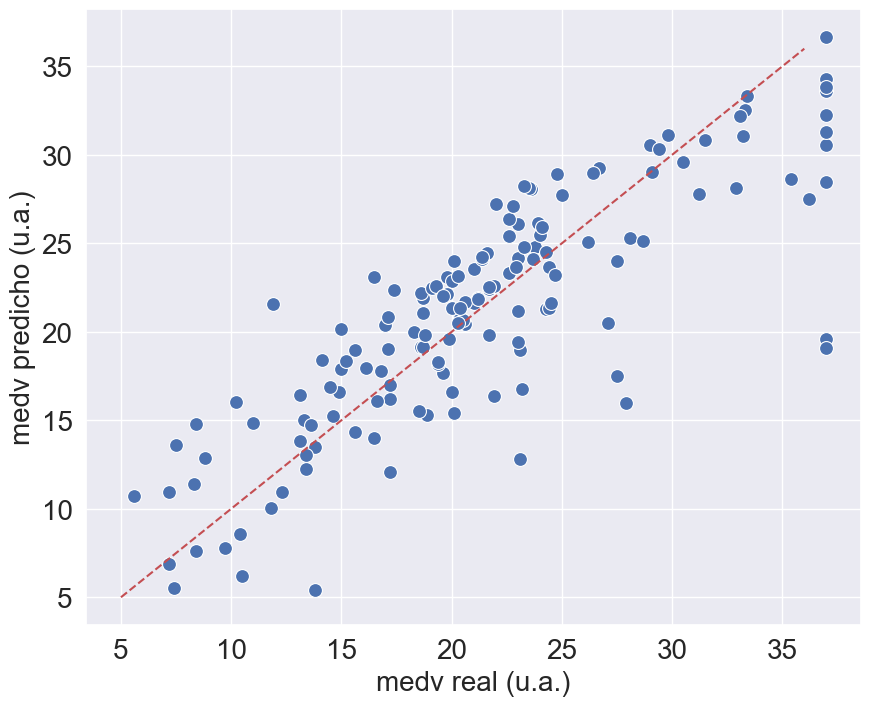

In [49]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=dfYinv, x="Y_test_inv", y="Y_test_pred_inv",color="b",s=100)
#--------------------código para el diseño del gráfico---------------------------------
plt.xlabel('medv real (u.a.)', fontsize='20')
plt.ylabel('medv predicho (u.a.)', fontsize='20')
plt.plot([5,36],[5,36],'--r')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

###  Histograma y curva de densidad de los residuos



---


Nos permite comprobar que de acuerdo con las hipótesis de partida de un método de regresión lineal, la distribución de probabilidad (frecuencia) de los residuos debe seguir una distribución aproximadamente normal o gaussiana. De acuerdo con el gráfico que obtenemos a continuación (curva suavizada KDE calculada sobre el histograma de los residuos) podemos decir que los residuos siguen la distribución esperada. 

In [50]:
Residuos = Y_test-Y_test_pred
sResiduos = pd.Series(Residuos)
sResiduos.name = 'Residuos'

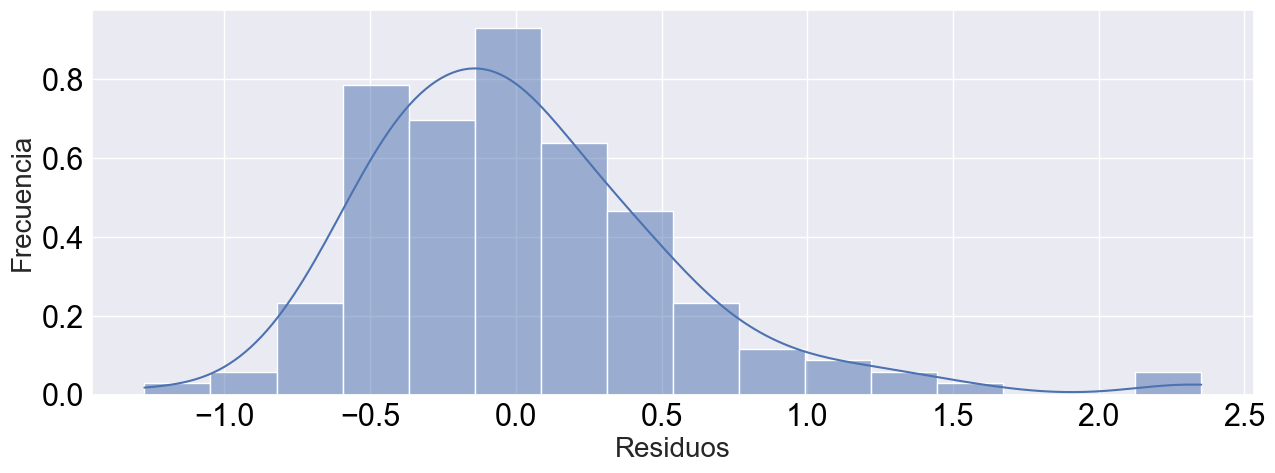

In [51]:
plt.figure('', figsize = (15,5))
g=sns.histplot(sResiduos, stat='density',kde=True)
#--------------------código para el diseño del gráfico---------------------------------
plt.xlabel('Residuos',size = 20)
plt.ylabel('Frecuencia',size = 20)
g.tick_params(axis='x', length=2,labelsize=22,labelcolor="black")
g.tick_params(axis='y', length=2,labelsize=22,labelcolor="black")

### Q-Q plot (test de normalidad de los residuos)

Representación cuantil-cuantil seleccionando una distribución normal (default) en [statsmodel](https://www.statsmodels.org/dev/generated/statsmodels.graphics.gofplots.qqplot.html).

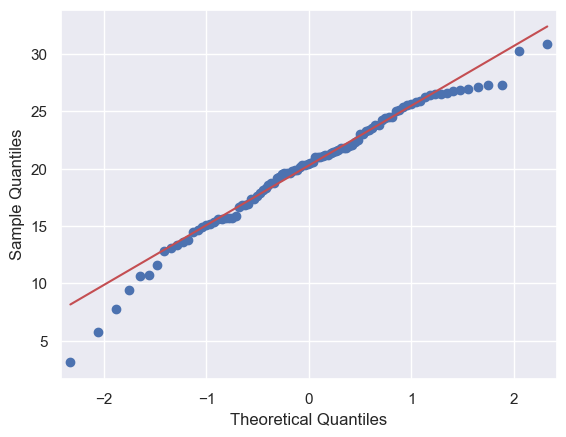

In [52]:
import statsmodels.api as sm
#ensayamos primero con una distribución normal sintética
test = np.random.normal(20, 5, 100) 
sm.qqplot(test, line='q')
plt.show()

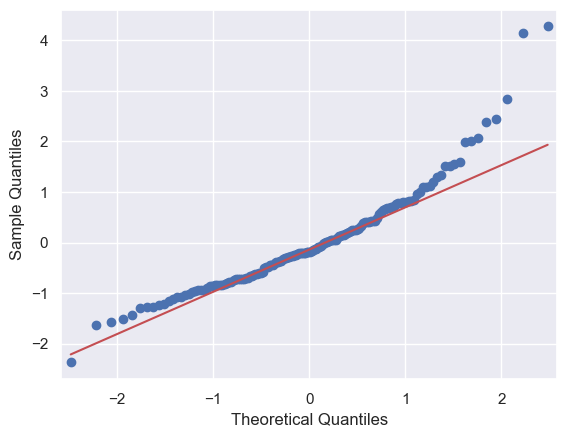

In [53]:
import statsmodels.api as sm
#Normalizamos los residuos
estand_sResiduos = (sResiduos-sResiduos.mean())/sResiduos.std()
sm.qqplot(estand_sResiduos, line='q')
plt.show()

### Diagrama de dispersión de los valores predichos frente a los residuos



---

Nos permite evaluar si existe algún tipo de dependencia entre los errores y los valores predichos, en este sentido si descubriéramos un patrón en el diagrama de dispersión querría decir que probablemente existe una relación de no linealidad que nos ha pasado inadvertida, que no es el caso. En la gráfica que obtenemos a continuación no se observa ningún patrón, tenemos una nube de puntos distribuida homogéneamente en torno del origen.


In [54]:
dfY_Residuos = pd.concat([sResiduos, sY_test_pred], axis=1)
dfY_Residuos.head()

,Residuos,Y_test_pred
0,-0.372435,0.467613
1,2.285219,-0.299108
2,-0.409519,0.557360
3,-0.411763,-1.375763
4,-0.092441,0.003299


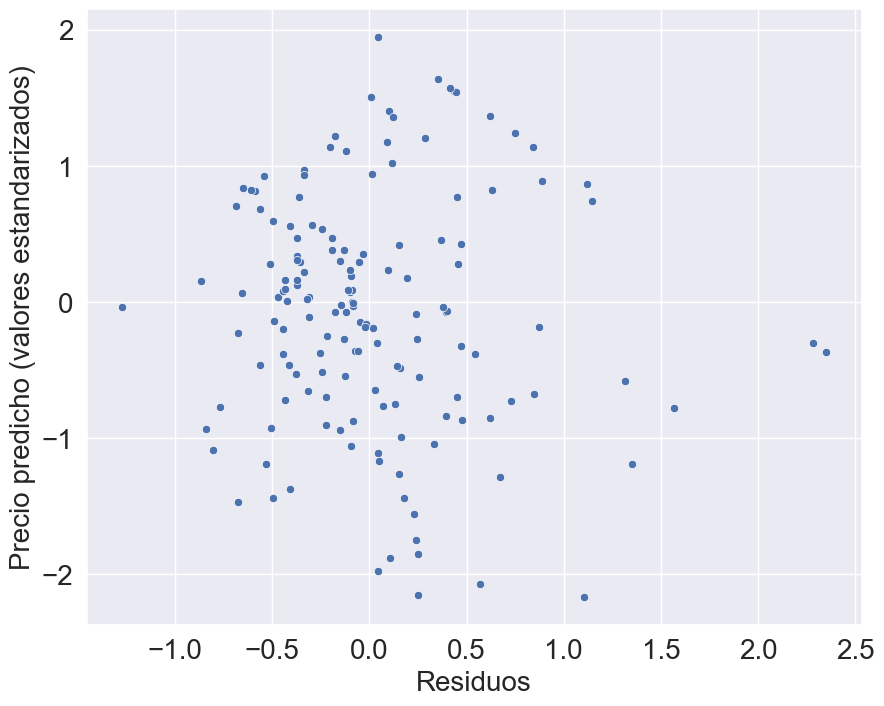

In [55]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=dfY_Residuos, x="Residuos", y="Y_test_pred",color="b")
#--------------------código para el diseño del gráfico---------------------------------
plt.xlabel('Residuos', fontsize='20')
plt.ylabel('Precio predicho (valores estandarizados)', fontsize='20')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

## ¿Cómo hacer predicciones a partir del modelo?






Una vez hemos puesto a prueba la capacidad predictiva del modelo con la muestra de ensayo (*test*), cuantitativa (métricas) y cualitativamente (gráficas), podemos utilizarlo para hacer predicciones con nuevos datos  de los que se desconoce cuál es el valor de la variable respuesta u objetivo (precio de la vivienda).


Y_pred = model.intercept_ + model.coef_ * $\mathbf{X}_{new}$

donde $\mathbf{X}_{new}$ representa la tabla de datos que contiene los nuevos valores de las variables independientes en el mismo orden:

$\mathbf{X}_{new} =$[ingresos, antiguedad, numhabitaciones, poblacion]


Como hemos estandarizados las variables, lo cual nos ha permitido mejorar las métricas que miden la bondad del ajuste, para poder hacer predicciones deberemos hallar los valores estandarizados de $\mathbf{X}_{new}$ para introducirlos en el modelo. Este es el mismo procedimiento que hemos aplicado tras la construcción del modelo pero con la muestra de test (X_train).

Y_new_pred= lr.predict(X_new) # X_new son los valores nuevos ya estandarizados (!)

Y_new_pred2D= Y_new_pred.reshape(-1,1) 

Y_new_pred_inv  = scalerY.inverse_transform(Y_new_pred)



---

Más información sobre la función que nos permite hallar los valores inversos de la estandarización [pinchar aquí](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.inverse_transform)



# LinearRegression de Scikit Learn (k-fold CV)


---

Se trata de un "*k-Fold Cross-Validation*"

Podemos seleccionar cualquiera de las métricas que nos interese mediante el argumento *scoring* (MAE, MSE, RMSE, R2) que se calculará para cada división-k.

Para más información:
[Cross-Validation](https://scikit-learn.org/stable/modules/cross_validation.html)


In [56]:
from sklearn.model_selection import cross_val_score
#Para R2
cv_linear = cross_val_score(estimator = lr, X=X, y=Y, scoring='r2', cv = 5) #suelen seleccionarse valores de cv=[5,10]
print("Valores de R2 en cada división:", cv_linear) #valor de la métrica (scoring) obtenido cada vez 
print("R2 (valor medio) ", cv_linear.mean())
print("R2 (desviación estándar) ", cv_linear.std())

Valores de R2 en cada división: [0.65621812 0.751716   0.70324262 0.42686542 0.2795525 ]
R2 (valor medio)  0.5635189320817788
R2 (desviación estándar)  0.180468888889592


In [57]:
from sklearn.model_selection import cross_val_score
#Para RMSE
cv_linear = cross_val_score(estimator = lr, X=X, y=Y, scoring='neg_root_mean_squared_error', cv = 5) #suelen seleccionarse valores de cv=[5,10]
print("Valores de RMSE en cada división:", cv_linear) #valor de la métrica (scoring) obtenido cada vez 
print("RMSE (valor medio) ", cv_linear.mean())
print("RMSE (desviación estándar) ", cv_linear.std())

Valores de RMSE en cada división: [-0.43388535 -0.49406538 -0.43144554 -0.75261133 -0.57607715]
RMSE (valor medio)  -0.5376169520686032
RMSE (desviación estándar)  0.11969220913561159


Podemos obtener la representación gráfica:

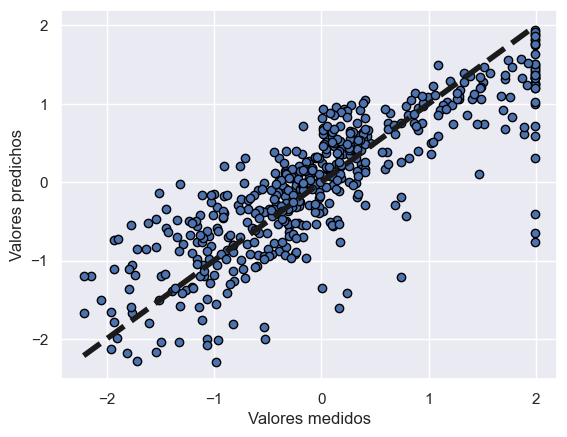

In [58]:
from sklearn.model_selection import cross_val_predict
Ypredichos = cross_val_predict(lr, X, Y, cv=5)
fig, ax = plt.subplots()
ax.scatter(Y, Ypredichos, edgecolors=(0, 0, 0))
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], "k--", lw=4)
ax.set_xlabel("Valores medidos")
ax.set_ylabel("Valores predichos")
plt.show()

# Métodos no supervisados de selección de variables 


---


*N.B: no supervisados se refiere a que en el proceso de selección de las variables predictoras $x_i$ no interviene la variable respuesta $y$.*


---



* Matriz de correlación
* Matriz de dispersión
* Coeficiente VIF (Variance Inflation Factor)





## Matriz de correlación


Partimos del *dataframe* df donde habíamos filtrado ya los datos de partida para evaluar la multicolinealidad.

In [59]:
corr = df.corr(method='pearson') 
corr.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.370213,0.629315,0.663412,-0.260057,0.518951,-0.555054,0.926977,0.870686,0.416269,-0.436156,0.592587,-0.538589
zn,-0.370213,1.000000,-0.584079,-0.549670,0.357439,-0.583149,0.681019,-0.344043,-0.383860,-0.432409,0.236768,-0.448131,0.428126
indus,0.629315,-0.584079,1.000000,0.763651,-0.408704,0.644779,-0.713079,0.595129,0.720760,0.382359,-0.417485,0.608158,-0.561174
nox,0.663412,-0.549670,0.763651,1.000000,-0.322413,0.731470,-0.775934,0.611441,0.668023,0.190159,-0.427034,0.595619,-0.506505
rm,-0.260057,0.357439,-0.408704,-0.322413,1.000000,-0.258788,0.224486,-0.206041,-0.292737,-0.353695,0.196260,-0.634425,0.697645


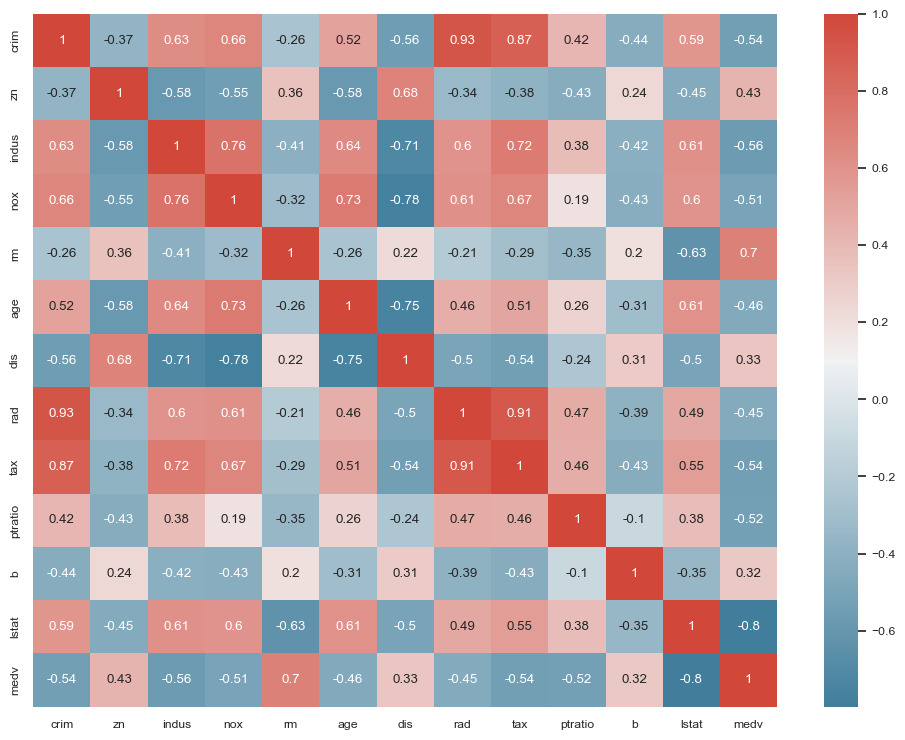

In [60]:
plt.figure(figsize=(12,9)) #seleccionamos un tamaño de imagen mayor
sns.set(font_scale=0.8) #seleccionamos un tamaño de letra legible
# preparación del gráfico definiendo un mapa de colores
cmap = sns.diverging_palette(230, 15, as_cmap=True)
# graficamos la correlación
sns.heatmap(corr, annot=True,  cmap=cmap)
plt.show()

A continuación podemos proceder a trabajar sobre la matriz triangular superior (por simetría) e imponer un umbral para filtrar las variables que tengan valores de correlación superiores a 0.9.

In [61]:
triang_sup = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
triang_sup   

/var/folders/99/x_thvh6101lbzztl8qnh9jyr0000gn/T/ipykernel_34408/3095359843.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  triang_sup = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))


,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,NaN,-0.370213,0.629315,0.663412,-0.260057,0.518951,-0.555054,0.926977,0.870686,0.416269,-0.436156,0.592587,-0.538589
zn,NaN,NaN,-0.584079,-0.549670,0.357439,-0.583149,0.681019,-0.344043,-0.383860,-0.432409,0.236768,-0.448131,0.428126
indus,NaN,NaN,NaN,0.763651,-0.408704,0.644779,-0.713079,0.595129,0.720760,0.382359,-0.417485,0.608158,-0.561174
nox,NaN,NaN,NaN,NaN,-0.322413,0.731470,-0.775934,0.611441,0.668023,0.190159,-0.427034,0.595619,-0.506505
rm,NaN,NaN,NaN,NaN,NaN,-0.258788,0.224486,-0.206041,-0.292737,-0.353695,0.196260,-0.634425,0.697645
age,NaN,NaN,NaN,NaN,NaN,NaN,-0.753333,0.456022,0.506456,0.263355,-0.307560,0.606711,-0.458662
dis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.500007,-0.540200,-0.238556,0.311406,-0.502644,0.333079
rad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.910228,0.466698,-0.392793,0.489186,-0.452679
tax,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.462693,-0.433288,0.545598,-0.543545
ptratio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.099739,0.376433,-0.523993


In [62]:
# Imponemos el umbral seleccionado sobre la matriz de correlación
variablescorr_drop = [column for column in triang_sup.columns if any(triang_sup[column] > 0.9)]
print(variablescorr_drop)

['rad', 'tax']


In [63]:
# Filtraríamos en este caso una de las dos variables ya que al estar altamente correlacionadas (de acuerdo con ese umbral) están aportando información duplicada al modelo.
#df = df.drop(df.columns['rad'], axis=1)
# En bases de datos con un número de variables predictoras muy alto se eliminan todas las variables por encima del umbral.
#df = df.drop(df.columns[variablescorr_drop], axis=1)
#print(df)

## Matriz de dispersión


---

Estudio de las relaciones entre las variables mediante la matriz de dispersión (aplicada solamente sobre las variables numéricas).

Nos permite visualizar los diagramas de dispersión por pares de variables así como la distribución de probabilidades de cada variable sobre los elementos de la diagonal.







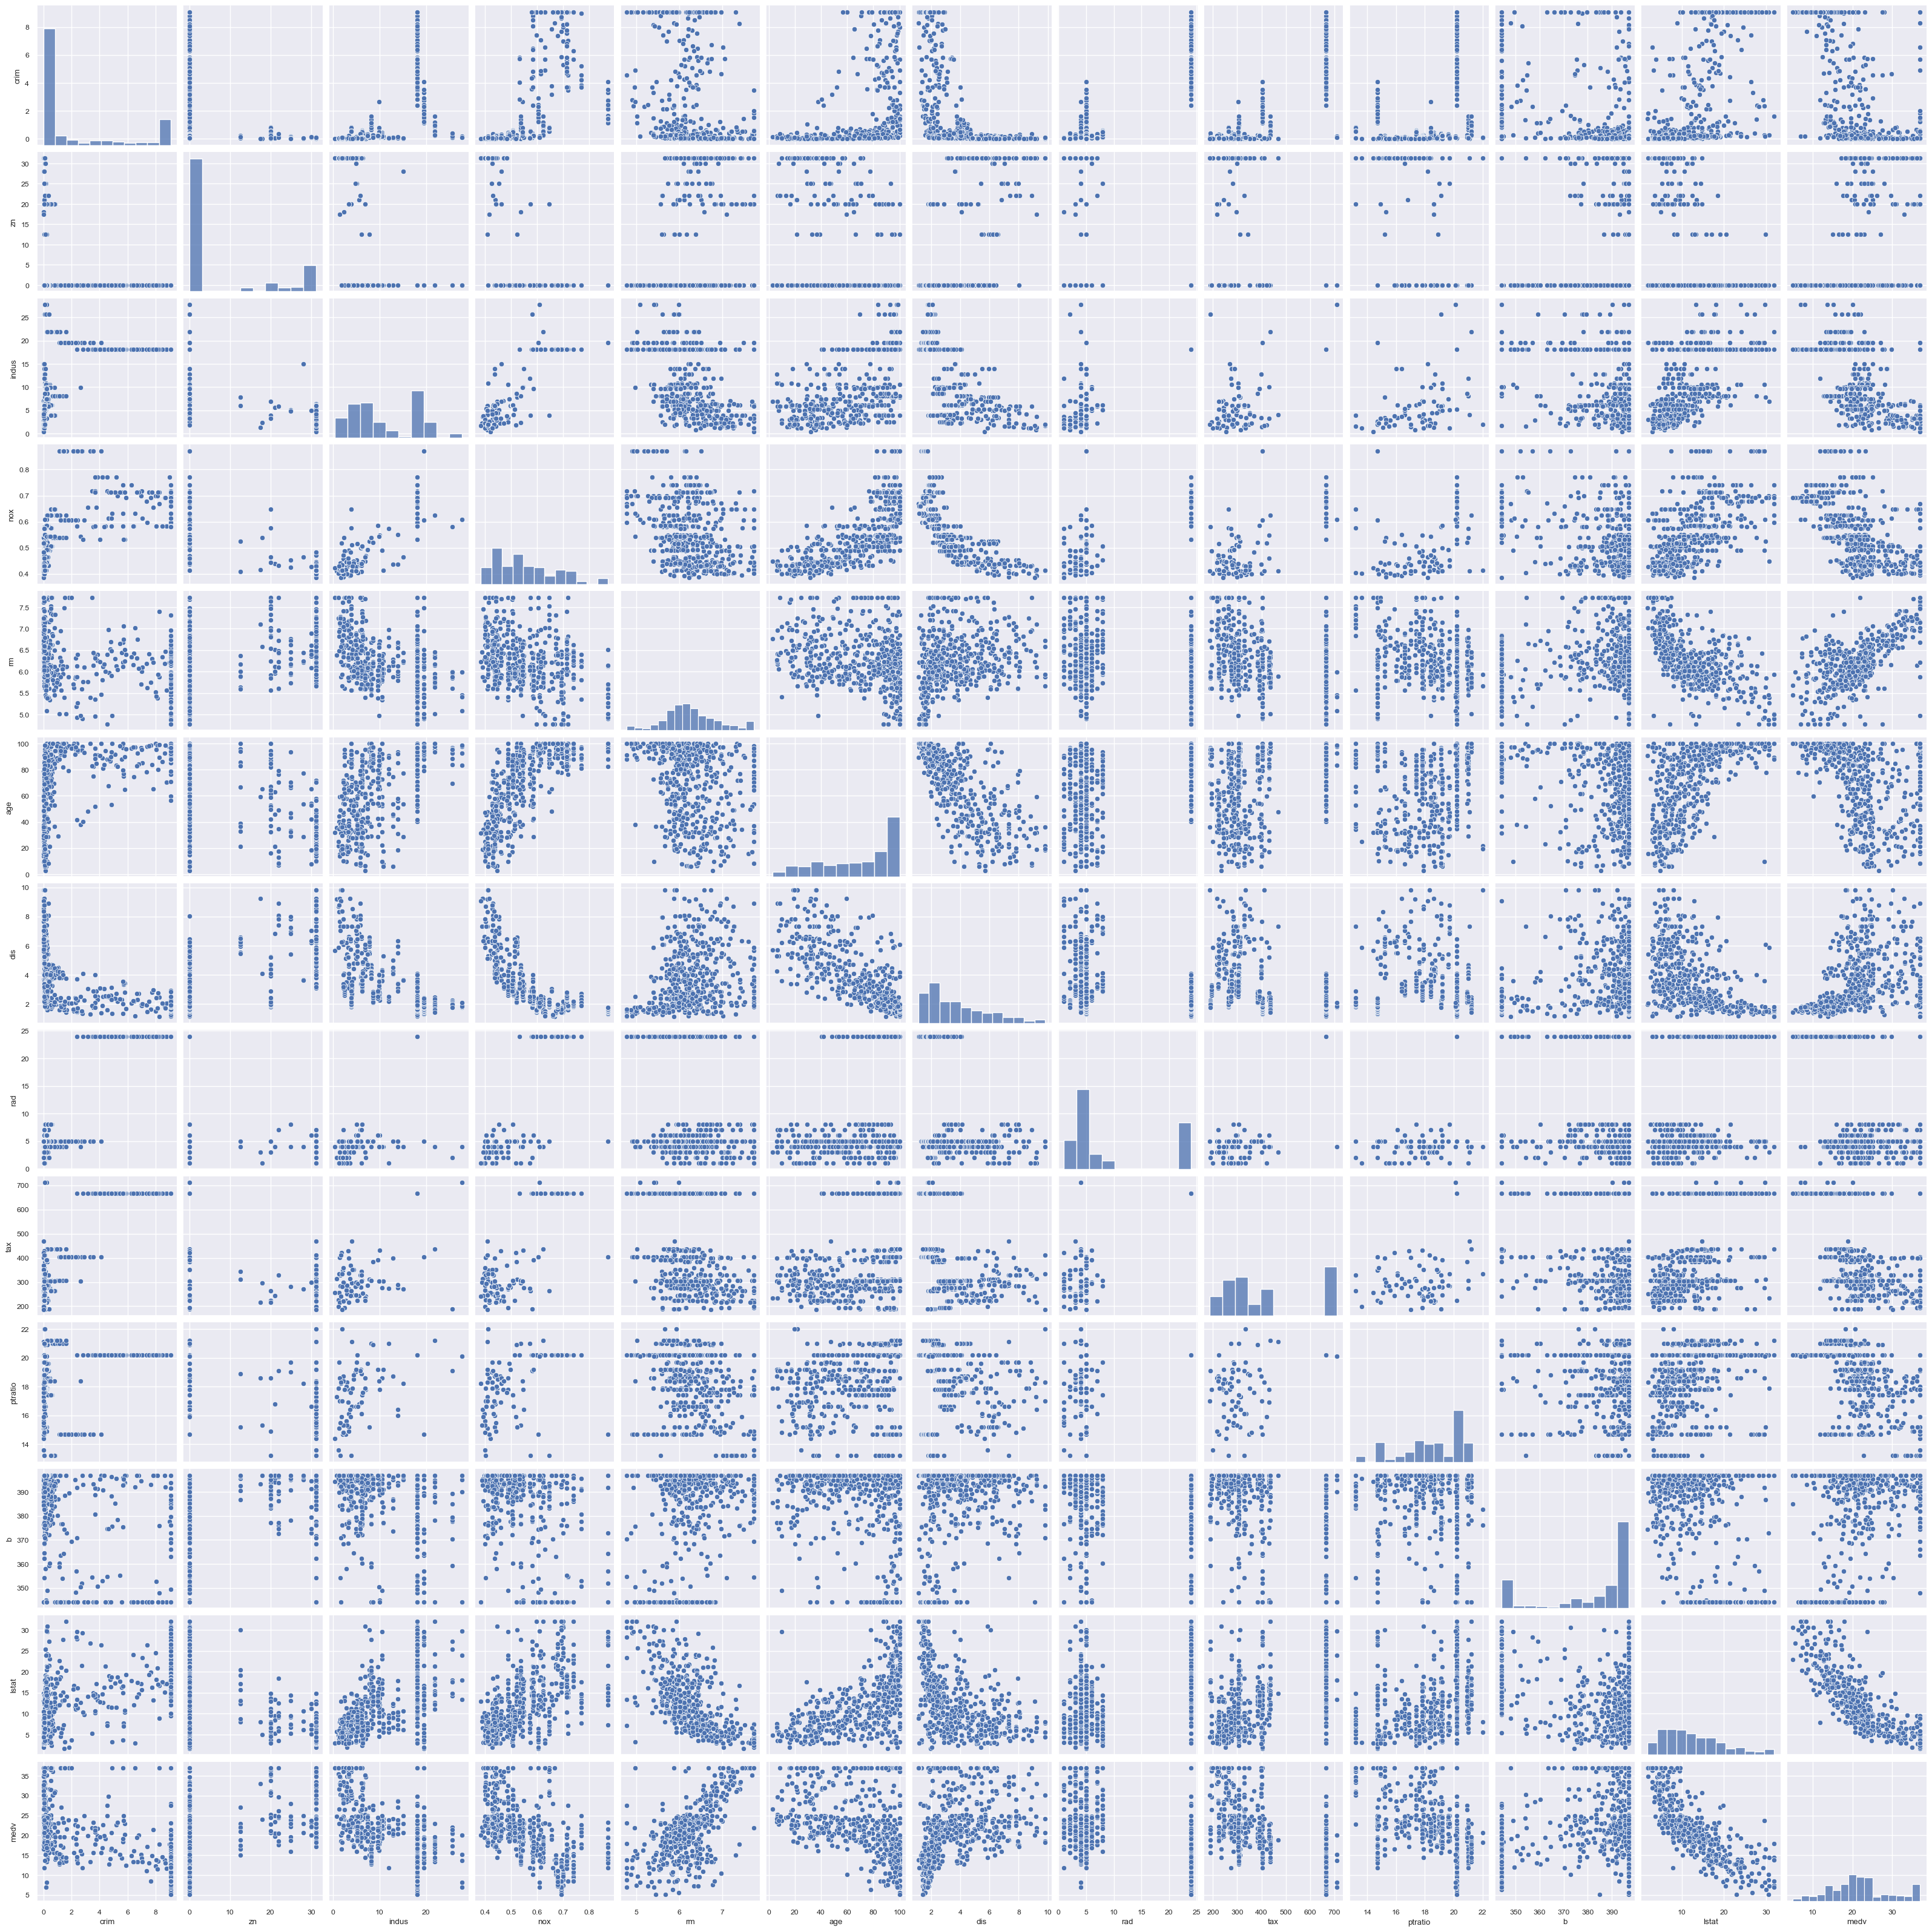

In [64]:
sns.pairplot(df)
plt.show()

## Análisis del coeficiente VIF 


El coeficiente VIF (*Variance Inflation Factor*):

$$VIF_k=\frac{1}{1-R_k^2}$$

Es una medida de la correlación entre la variable predictora $x_k$ y el resto de variables predictoras. 

*Notar que el valor mínimo de VIF_k = 1 (cuando $R_k^2=0$), por lo que en este caso diremos que no existe multicolinealidad de esta variable $x_k$ con el resto.*

En general se considera que:
-  un valor de $VIF \ge 5$ representa una multicolinealidad moderada ($R^2=0.8$).
-  un valor de $VIF \ge 10$ representa una multicolinealidad severa ($R^2=0.9$).


---

VIF sólo se encuentra disponible en la librería *statsmodels* mediante la función **variance_inflation_factor** [+info](https://www.statsmodels.org/dev/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html)


In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
dfvif = df.drop('medv', axis=1) #eliminamos la columna de la variable respuesta Y.
dfvif.shape[1] #hacemos la comprobación

12

Ahora calculamos el coeficiente VIF para todas las variables predictoras:


*variance_inflation_factor*(dataframe con todas las variables predictoras, índice de posición de la variable $x_k$)

In [66]:
vif = [[dfvif.columns[i], variance_inflation_factor(dfvif.to_numpy(), i)] for i in range(dfvif.shape[1])]
df_vif=pd.DataFrame(vif)  
df_vif=df_vif.rename(columns = {0:'Variable',1:'VIF'})
df_vif                                                                             

,Variable,VIF
0,crim,13.550856
1,zn,3.247669
2,indus,14.464912
3,nox,85.436302
4,rm,145.315197
5,age,21.474667
6,dis,16.275387
7,rad,26.737761
8,tax,58.110304
9,ptratio,123.345327



# Métodos supervisados de selección de variables predictoras


---





*N.B: Supervisados se refiere a que en el proceso de selección de variables predictoras interviene $x_i$ también la variable respuesta $y$.*




---
Utilizaremos la librería **statsmodels** para:


1. Selección univariante de las variables predictoras a partir del valor de *t*, *p* e intervalos de confianza.

> - La función **OLSResults.t_test** [+info](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLSResults.t_test.html)

Utilizaremos la librería **sklearn.feature_selection** para:

2. Selección univariante de las variables predictoras a partir del valor del coeficiente de correlación de Pearson.

> - La clase **SelectKBest** [+info](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html) (seleccionamos *r_regression*) [+info](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.r_regression.html#sklearn.feature_selection.r_regression)

3. Selección univariante de las variables predictoras a partir del valor de *f*:

> - La función **f_regression** (*univariate linear regression*) [+info](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html)
> - La clase **SelectKBest** (seleccionamos *f_regression*) [+info](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html)


4. Selección secuencial de variables predictoras mediante:

> - La clase **SequentialFeatureSelector (SFS)** [+info](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html) 


5. Eliminación recursiva de variables predictoras:

> - La clase **Recursive Feature Elimination (RFE)** [+info](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html)
> - La misma clase con **cross-validation (RFECV)** [+info](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html#sklearn.feature_selection.RFECV)



---


En un modelo de regresión lineal, la función *Selección del modelo* nos permite imponer un umbral sobre el valor de los parámetros o coeficientes de la regresión (**SelectfromModel** [+info]( https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html)).



*Estos métodos de selección de variables también pueden clasificarse entre automáticos (SelectKBest,RFE,...) y no automáticos (t-test, f-test).*

---


---



*Otras librerías en Python:* También existen métodos de selección de variables predictoras desarrollados en la librería [mlxtend](http://rasbt.github.io/mlxtend/) que se especializa en estos dos métodos de selección: [**exhaustivos ("Best Subset") y secuenciales**](http://rasbt.github.io/mlxtend/api_subpackages/mlxtend.feature_selection/).

Ejemplos:

* [Método exhaustivo](http://rasbt.github.io/mlxtend/user_guide/feature_selection/ExhaustiveFeatureSelector/)
* [Método secuencial](http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/)

## Selección univariante de variables predictoras

### Selección univariante: Test *t* 


Utilizamos la librería **statsmodel** para obtener la tabla completa de los resultados estadísticos de una regresión lineal.


---


El **objetivo** aquí es obtener los valores de *t*, *valor de p* e *intervalo de confianza* de todos los parámetros o coeficientes del modelo de regresión lineal. Para ello, *Statsmodel* utiliza la distribución *t* de Student. 

**Es importante recordar que:** Los resultados para cada parámetro resultan del análisis univariante (regresión lineal de cada variable predictora con la variable respuesta).


Statsmodels calcula por defecto intervalos de confianza del 95%  ($\alpha= 0.05$) que representa el rango en el que probablemente se encuentren los valores de los parámetros.
>> En otras palabras, si se extrajeran 100 muestras de la misma población, los intervalos de confianza de 95 muestras contendrían el valor correcto. 



---

Planteamiento del test de hipótesis:


* $H_0$ **hipótesis nula:** No existe relación lineal entre la variable predictora y la variable respuesta ($\Theta_i=0$ )
* $H_a$ **hipótesis alternativa:** Sí existe relación lineal la variable predictora y la variable respuesta ($\Theta_i\ne0$ ).

Para valores de *p* $\le$ 0.05 consideramos que existe una relación lineal entre la variable predictora y la variable respuesta.







---




In [67]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
X2 = sm.add_constant(X) #sm.OLS requiere añadir una columna de unos que representa la variable de valor constante x_0=1
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     150.3
Date:                Sat, 10 Dec 2022   Prob (F-statistic):          4.64e-156
Time:                        10:05:58   Log-Likelihood:                -328.71
No. Observations:                 506   AIC:                             683.4
Df Residuals:                     493   BIC:                             738.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.279e-16      0.021   1.57e-14      1.0

In [154]:
dflista_columnas=pd.DataFrame(lista_columnas)
dflista_columnas=dflista_columnas.rename(columns={0:'Variable predictora'})
est2_res = est2.summary2()
rfilter = est2_res.tables[1]["P>|t|"][1:] > 0.05
dfKBest_r = dflista_columnas[rfilter.to_list()]["Variable predictora"]
dfKBest_r

1        zn
2     indus
5       age
10        b
Name: Variable predictora, dtype: object

### Clase SelectKBest (r_regression)

Se trata de una metafunción que nos permite automatizar el proceso de selección de variables sobre el valor del coeficiente de correlación de Pearson *r*. 


El coeficiente *r* se calcula para las regresiones de cada una de las variables predictoras con la variable respuesta.




In [96]:
from sklearn.feature_selection import r_regression, SelectKBest
rselect = SelectKBest(r_regression, k=8) # Seleccionamos las mejores 5 variables predictoras
rselect.fit_transform(X, Y)
rselect.transform(X).shape #comprobamos el número k en la posición del número de columnas

(506, 8)

In [105]:
rselect.scores_

array([-0.53858896,  0.4281263 , -0.56117413, -0.50650522,  0.69764454,
       -0.45866155,  0.33307941, -0.4526788 , -0.54354511, -0.52399291,
        0.32125033, -0.79720045])

In [97]:
rfilter = rselect.get_support(indices=True)
print(rfilter[0:])

[ 1  3  4  5  6  7  9 10]


A partir del listado de variables predictoras, con el indexado correspondiente, identificamos las seleccionadas mediante el coeficiente de correlación de Pearson $r$:

In [98]:
dflista_columnas=pd.DataFrame(lista_columnas)
dflista_columnas=dflista_columnas.rename(columns={0:'Variable predictora'})
dfKBest_r=dflista_columnas.iloc[rfilter, 0]
dfKBest_r

1          zn
3         nox
4          rm
5         age
6         dis
7         rad
9     ptratio
10          b
Name: Variable predictora, dtype: object

### Selección univariante: Test *F*



---
Podemos utilizar el test de 1 cola (distribución *F*) para determinar el grado de colinealidad entre las variables predictoras y la variable respuesta.

El **objetivo** aquí es obtener los valores de *F* (y el *valor de p*) de todos los parámetros o coeficientes del modelo de regresión lineal. 

**Es importante recordar que:** Los resultados para cada parámetro resultan del análisis univariante (regresión lineal de cada variable predictora con la variable respuesta).

---

Planteamiento del test de hipótesis:


* $H_0$ **hipótesis nula:** No existe relación lineal entre la variable predictora y la variable respuesta ($\Theta_i=0$ )
* $H_a$ **hipótesis alternativa:** Sí existe relación lineal la variable predictora y la variable respuesta ($\Theta_i\ne0$ ).

Para valores de *F* $\gg$  consideramos que existe una relación lineal entre la variable predictora y la variable respuesta (rechazamos $H_0$). Sin embargo, para valores de $F \sim 1$ aceptamos $H_0$.


---


Notar que algebraicamente los tests *t* y *f* son equivalentes.

In [113]:
from sklearn.feature_selection import f_regression
f_values, p_values = f_regression(X, Y)
#psorted_values = p_values.sort()
#fsorted_values = f_values.sort()
print(p_values)
print(f_values)

[2.10013034e-039 5.70179808e-024 2.55236406e-043 2.50772305e-034
 5.22211950e-075 1.08780931e-027 1.41818235e-014 6.24082403e-027
 3.07881192e-040 5.00299538e-037 1.30489809e-013 1.54046619e-112]
[205.9372118  113.11172367 231.67664834 173.91826396 477.89707066
 134.27395616  62.89208274 129.89695413 211.34137155 190.75897715
  57.99932872 878.82441786]


Text(0, 0.5, 'Valor de F')

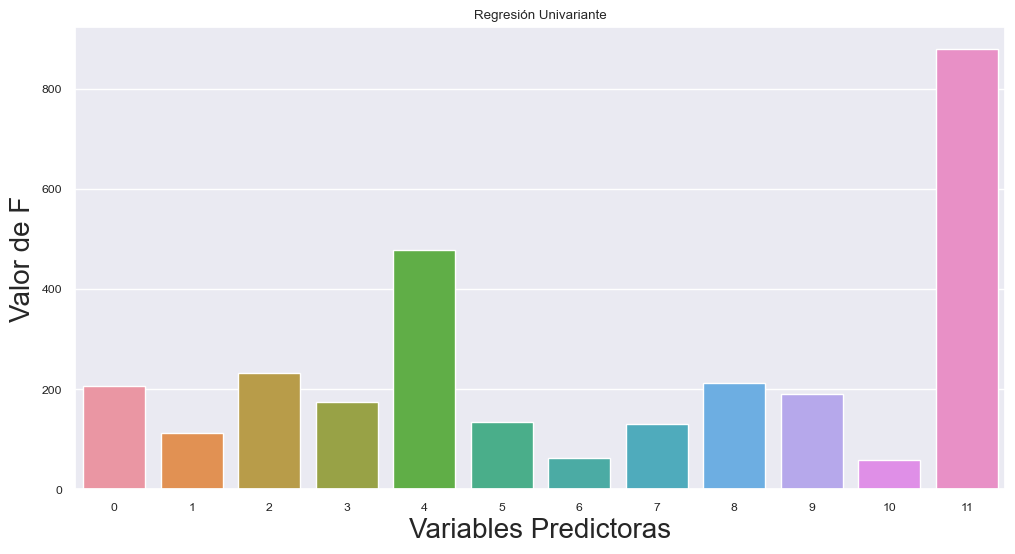

In [114]:
fig, ax = plt.subplots(figsize = (12 , 6))
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax = sns.barplot(x=np.arange(len(f_values)), y=f_values).set(title='Regresión Univariante')
plt.xlabel('Variables Predictoras')
plt.ylabel('Valor de F')

Seleccionamos n mejores variables 

In [155]:
n = 5
f_values2 = f_values.copy()
f_values2.sort()
thresh_4 = f_values2[-n:][0]
mask_4 = f_values >= thresh_4
dflista_columnas[mask_4]["Variable predictora"]

0      crim
2     indus
4        rm
8       tax
11    lstat
Name: Variable predictora, dtype: object

### Clase SelectKBest (f_regression)

Se trata de una metafunción que nos permite automatizar el proceso de selección de variables sobre el valor de *f*. 

In [123]:
from sklearn.feature_selection import SelectKBest
fselect = SelectKBest(f_regression, k=5) # Seleccionamos las mejores 5 variables predictoras
fselect.fit_transform(X,Y)
fselect.transform(X).shape

(506, 5)

Sobre este nuevo *dataframe* con las k variables predictoras más significativas procederíamos a realizar la división en muestra de entrenamiento y muestra de teset.

In [124]:
ffilter = fselect.get_support(indices=True)
print(ffilter)

[ 0  2  4  8 11]


A partir del listado de variables predictoras, con el indexado correspondiente, identificamos las seleccionadas mediante el valor de $f$:

In [125]:
dfKBest_f=dflista_columnas.iloc[ffilter, 0]
dfKBest_f

0      crim
2     indus
4        rm
8       tax
11    lstat
Name: Variable predictora, dtype: object

## Selección secuencial de variables predictoras (SFS)


En cada etapa se selecciona la variable predictora óptima en función del resultado de la métrica correspondiente (para LinearRegression seleccionamos **scoring**= 'r2') mediante la técnica de validación cruzada que por defecto asigna el valor **cv** $=5$. 

Si queremos podemos ensayar con otras métricas [+info].(
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
)

Mediante el argumento **direction** puede seleccionarse la dirección de la selección secuencial: *forward* o *backward*.



---

*Notar que en esta técnica en cada paso se obtiene el valor óptimo local que no tiene porqué coindicir con el óptimo global. A este tipo algoritmos se les denomina "greedy algorithms"*.



In [126]:
from sklearn.feature_selection import SequentialFeatureSelector
lr= LinearRegression() 
sfs = SequentialFeatureSelector(lr, n_features_to_select=5, scoring= 'r2', direction='backward') #NB: direction{‘forward’, ‘backward’}, default=’forward’
sfs.fit(X, Y)
sfs.transform(X).shape

(506, 5)

In [127]:
sfsfilter = sfs.get_support(indices=True)
print(sfsfilter)

[ 3  6  7  9 11]


A partir del listado de variables predictoras, con el indexado correspondiente, identificamos las seleccionadas mediante el método de selección secuencial de variables (SFS):

 

In [128]:
dfsfs=dflista_columnas.iloc[sfsfilter, 0]
dfsfs

3         nox
6         dis
7         rad
9     ptratio
11      lstat
Name: Variable predictora, dtype: object

## Eliminación recursiva de variables (RFE)


Primero trabajamos con la función **RFE** que nos permite crear el conjunto de variables predictoras más importantes. 

* El número de variables predictoras con las que se desea construir el modelo de regresión se selecciona inicialmente. 

* Partiendo del conjunto de todas las variables predictoras, en cada paso la variable con menor importancia es eliminada (argumento *step* = 1).

* La importancia de las variables se mide a partir del valor de los parámetros o coeficientes de la regresión lineal (*coef_*).



---

*Notar que en esta técnica de selección se consideran los pesos de las variables predictoras*

In [151]:
from sklearn.feature_selection import RFE
lr= LinearRegression()
rfe= RFE(lr, n_features_to_select=8, step=1)
rfe.fit(X, Y)
rfe.transform(X).shape

(506, 8)

In [152]:
rfefilter = rfe.get_support(indices=True)
print(rfefilter)

[ 0  3  4  6  7  8  9 11]


A partir del listado de variables predictoras, con el indexado correspondiente, identificamos las seleccionadas mediante el método de eliminación recursiva de variables (RFE):

In [153]:
dfrfe=dflista_columnas.iloc[rfefilter, 0]
dfrfe

0        crim
3         nox
4          rm
6         dis
7         rad
8         tax
9     ptratio
11      lstat
Name: Variable predictora, dtype: object

A continuación trabajamos con la eliminación recursiva con validación cruzada (función **RFECV**).


* Al argumento *cv* por defecto se le asigna el valor de 5.
* Al argumento *min_features_to_select* por defecto se le asigna el valor de 1.

**Notar que** a diferencia de RFE con este algoritmo RFECV se seleccionan las variables predictoras más importantes en número igual o superior a *min_features_to_select*.




In [141]:
from sklearn.feature_selection import RFECV
lr= LinearRegression()
rfecv = RFECV(lr, step=1, min_features_to_select=5, cv=10)
rfecv.fit(X, Y)
rfecv.transform(X).shape

(506, 8)

In [142]:
rfecvfilter = rfecv.get_support(indices=True)
print(rfecvfilter)

[ 0  3  4  6  7  8  9 11]


 A partir del listado de variables predictoras, con el indexado correspondiente, identificamos las seleccionadas mediante el método de eliminación recursiva de variables con validación cruzada (RFECV):

In [143]:
dfrfecv=dflista_columnas.iloc[rfecvfilter, 0]
dfrfecv

0        crim
3         nox
4          rm
6         dis
7         rad
8         tax
9     ptratio
11      lstat
Name: Variable predictora, dtype: object

# Técnicas de regularización



* La regularización sirve para evitar el overfitting 
* Es válida tanto en problemas de regresión como clasificación
* Consiste en una modificación de la función de coste
* Tenemos un hiper-parámetro, $\lambda=[0,\infty)$ con el que podemos controlar cuánto regularizamos nuestro modelo


---



Veremos dos técnicas de regularización: Ridge y Lasso.





#### Regresión de Ridge

Esta clase se utiliza para ajustar un modelo de regresión lineal en el que usamos regularización *L2*. 

El factor de regularización se controla con siguiente parámetro:

* `alpha`: el factor de regularización (nuestro $\lambda$). Por defecto, toma el valor de 1.0. Si seleccionamos el valor de 0 es similar a una regresión sin regularización.


Vamos a ver un ejemplo de regresión lineal con regularización usando scikit-learn.





In [157]:
from sklearn.linear_model import Ridge
ridge_regression = Ridge(alpha=100, solver = 'auto', random_state = 9) #Si selecionamos alpha = 0 se correspondería con una regresión lineal sin penalización
ridge=ridge_regression.fit(X_train, Y_train)
print("Los parámetros de la regresión de Ridge son\n", ridge.coef_) #Comprobamos el peso que se asigna a las distintas variables predictoras
Y_train_pred_ridge = ridge_regression.predict(X_train)
Y_test_pred_ridge = ridge_regression.predict(X_test)
###############Cálculo de las métricas#######################
print("Métricas calculadas sobre la muestra de entrenamiento")
metricasRidge_train=calculametricas(Y_train, Y_train_pred_ridge)
print("Métricas calculadas sobre la muestra de test")
metricasRidge_test=calculametricas(Y_test, Y_test_pred_ridge)

Los parámetros de la regresión de Ridge son
 [-0.1114554   0.03033349 -0.05852145 -0.07180798  0.27253941 -0.05351626
 -0.13029009  0.03451415 -0.07020415 -0.19572591  0.04037808 -0.30329371]
Métricas calculadas sobre la muestra de entrenamiento
MAE :  0.3571536460745608
MSE :  0.21475070027459875
RMSE :  0.46341201999365395
R2 :  0.7863138751466343
Métricas calculadas sobre la muestra de test
MAE :  0.41665485832230087
MSE :  0.32974112348393175
RMSE :  0.5742308973609238
R2 :  0.6644943013585509


In [162]:
metricasRidge_train[3]

0.7863138751466343

In [172]:
alphas = np.arange(0.1,10,0.1)
r2_train = []
r2_test = []

for alpha in alphas:
    ridge_regression = Ridge(alpha=alpha, solver = 'auto', random_state = 9) #Si selecionamos alpha = 0 se correspondería con una regresión lineal sin penalización
    ridge=ridge_regression.fit(X_train, Y_train)
    # ("Los parámetros de la regresión de Ridge son\n", ridge.coef_) #Comprobamos el peso que se asigna a las distintas variables predictoras
    Y_train_pred_ridge = ridge_regression.predict(X_train)
    Y_test_pred_ridge = ridge_regression.predict(X_test)
    ###############Cálculo de las métricas#######################
    # print("Métricas calculadas sobre la muestra de entrenamiento")
    metricasRidge_train=calculametricas2(Y_train, Y_train_pred_ridge);
    r2_train.append(metricasRidge_train[3])
    # print("Métricas calculadas sobre la muestra de test")
    metricasRidge_test=calculametricas2(Y_test, Y_test_pred_ridge);
    r2_test.append(metricasRidge_test[3])

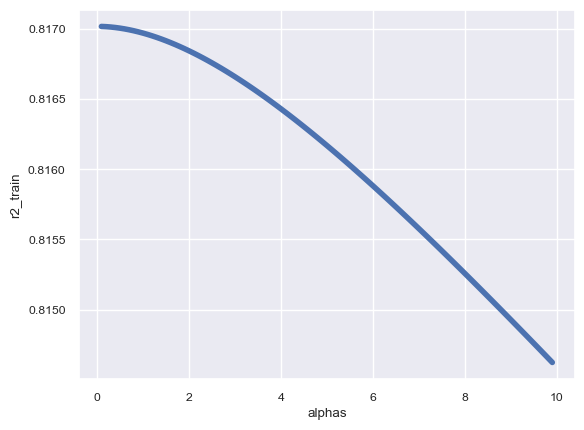

In [173]:
fig, ax = plt.subplots()
ax.plot(alphas,r2_train , lw=4)
ax.set_xlabel("alphas")
ax.set_ylabel("r2_train")
plt.show()

#### Regresión de Lasso

Esta clase se utiliza para ajustar un modelo de regresión lineal en el que usamos regularización *L1*. 

El factor de regularización se controla con siguiente parámetro:

* `alpha`: el factor de regularización (nuestro $\lambda$). Por defecto, toma el valor de 1.0.Si seleccionamos el valor de 0 es similar a una regresión sin regularización.


Vamos a ver un ejemplo de regresión lineal con regularización usando scikit-learn.


In [145]:
            from sklearn.linear_model import Lasso
lasso_regression = Lasso(alpha=0.01, random_state = 8) 
lasso=lasso_regression.fit(X_train, Y_train)
print("Los parámetros de la regresión de Lasso son\n", lasso.coef_) #Comprobamos el peso que se asigna a las distintas variables predictoras
Y_train_pred_lasso = lasso_regression.predict(X_train)
Y_test_pred_lasso = lasso_regression.predict(X_test)
###############Cálculo de las métricas#######################
print("Métricas calculadas sobre la muestra de entrenamiento")
metricasLasso_train=calculametricas(Y_train, Y_train_pred_lasso)
print("Métricas calculadas sobre la muestra de test")
metricasLasso_test=calculametricas(Y_test, Y_test_pred_lasso)

Los parámetros de la regresión de Lasso son
 [-0.2067939   0.01830492 -0.02654557 -0.1433644   0.27992244 -0.0376464
 -0.22447213  0.16634004 -0.09377176 -0.23565347  0.01183677 -0.40433095]
Métricas calculadas sobre la muestra de entrenamiento
MAE :  0.32965595767710143
MSE :  0.1900824897796271
RMSE :  0.43598450635272246
R2 :  0.8108597988665447
Métricas calculadas sobre la muestra de test
MAE :  0.40246130504500727
MSE :  0.30052000455549477
RMSE :  0.5481970490211479
R2 :  0.6942262675069826


#### Importancia de las variables predictoras de los modelos

Vamos a representar los valores de los parámetros de los coeficientes de la regresión comparando los resultados obtenidos por el modelo de regresión lineal sin regularización y con regularización de Ridge y Lasso.

In [149]:
dflrcoef=pd.DataFrame(parametroslr)
dfridgecoef=pd.DataFrame(ridge.coef_)
dflassocoef=pd.DataFrame(lasso.coef_)
dflrcoef=dflrcoef.rename(columns = {0:'Parámetro_lr'})
dfridgecoef=dfridgecoef.rename(columns = {0:'Parámetro_ridge'})
dflassocoef=dflassocoef.rename(columns = {0:'Parámetro_lasso'})
dfcoeficientes=dflrcoef.join(dflassocoef).join(dfridgecoef)
dfcoeficientes= dfcoeficientes.rename_axis('Variable').reset_index()
dfcoeficientes

,Variable,Parámetro_lr,Parámetro_lasso,Parámetro_ridge
0,0,-0.354077,-0.206794,-0.339436
1,1,0.046480,0.018305,0.045134
2,2,-0.014847,-0.026546,-0.017718
3,3,-0.178591,-0.143364,-0.175236
4,4,0.273986,0.279922,0.274618
5,5,-0.059734,-0.037646,-0.059980
6,6,-0.301303,-0.224472,-0.297236
7,7,0.400060,0.166340,0.377919
8,8,-0.202392,-0.093772,-0.192385
9,9,-0.249065,-0.235653,-0.247468


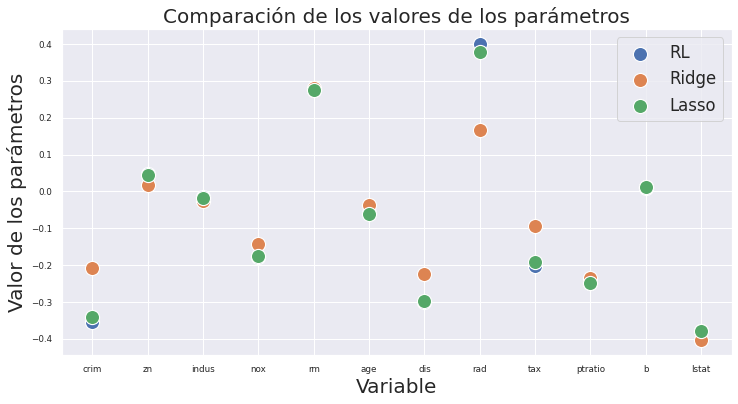

In [ ]:
fig, ax = plt.subplots(figsize = (12 , 6))
sns.set(font_scale=1.5)
sns.scatterplot(data=dfcoeficientes, x='Variable', y='Parámetro_lr',legend='full',palette='bright',s=200)
sns.scatterplot(data=dfcoeficientes, x='Variable', y='Parámetro_lasso',legend='full',palette='bright',s=200)
sns.scatterplot(data=dfcoeficientes, x='Variable', y='Parámetro_ridge',legend='full',palette='bright',s=200)
ax.set_title( "Comparación de los valores de los parámetros" , size = 20)
ax.set_xlabel('Variable',size=20)
ax.set_ylabel('Valor de los parámetros',size=20)
ax.legend(loc='upper right', labels=['RL', 'Ridge','Lasso'])
ax.set_xticks(range(len(lista_columnas)))
ax.set_xticklabels(lista_columnas)
plt.show()

#### Estudio comparativo de las métricas

In [ ]:
dfmetricasLR_test=pd.DataFrame(metricasLR_test)
dfmetricasRidge_test=pd.DataFrame(metricasRidge_test)
dfmetricasLasso_test=pd.DataFrame(metricasLasso_test)
dfmetricasLRRL_test=pd.concat([dfmetricasLR_test, dfmetricasRidge_test, dfmetricasLasso_test],axis=1,ignore_index=True)
dfmetricasLRRL_test = dfmetricasLRRL_test.rename(columns = {0:'LR',1:'Ridge',2:'Lasso'},index={0: 'MAE',1:'MSE',2:'RMSE',3:'R2'})
dfmetricasLRRL_test

,LR,Ridge,Lasso
MAE,0.398199,0.397945,0.402461
MSE,0.295870,0.295872,0.300520
RMSE,0.543939,0.543941,0.548197
R2,0.698958,0.698956,0.694226


In [187]:
alphas = np.arange(0.001,0.2,0.001)
r2_train = []
r2_test = []

for alpha in alphas:
    lasso_regression = Lasso(alpha=alpha, random_state = 8) 
    lasso=lasso_regression.fit(X_train, Y_train)
    # print("Los parámetros de la regresión de Lasso son\n", lasso.coef_) #Comprobamos el peso que se asigna a las distintas variables predictoras
    Y_train_pred_lasso = lasso_regression.predict(X_train)
    Y_test_pred_lasso = lasso_regression.predict(X_test)
    ###############Cálculo de las métricas#######################
    # print("Métricas calculadas sobre la muestra de entrenamiento")
    metricasLasso_train=calculametricas2(Y_train, Y_train_pred_lasso)
    # print("Métricas calculadas sobre la muestra de test")
    metricasLasso_test=calculametricas2(Y_test, Y_test_pred_lasso)
    ###############Cálculo de las métricas#######################
    # print("Métricas calculadas sobre la muestra de entrenamiento")
    r2_train.append(metricasLasso_train[3])
    r2_test.append(metricasLasso_test[3])

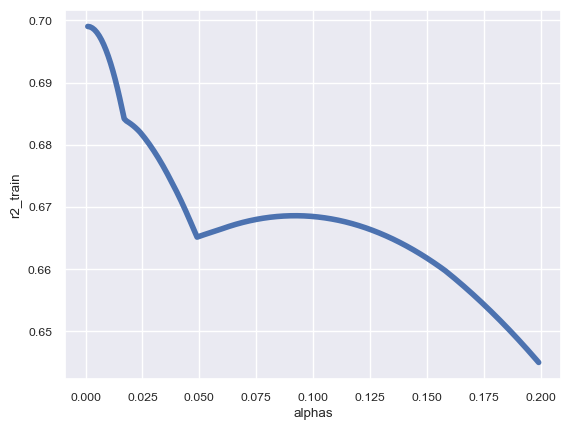

In [188]:
fig, ax = plt.subplots()
ax.plot(alphas,r2_test , lw=4)
ax.set_xlabel("alphas")
ax.set_ylabel("r2_train")
plt.show()

# Ejercicios

1. Escribir el modelo resultante de la regresión lineal sin regularización y los modelos obtenidos con las regresiones con regularización de Ridge y Lasso considerando todas las variables predictoras del problema. Comparar los modelos e interpretarlos a partir de las métricas y las técnicas validación gráfica.

2. Ensayar otros valores de `k` o `n_features_to_select` en los siguientes métodos supervisados de selección de variables:


*   SelectKBest (r_regresion y f_regression).
*   Selección secuencial, SFS (backward y forward).
*   Eliminación recursiva, RFE y RFECV.


3.  Construir una tabla comparativa con los resultados obtenidos mediante las distintas técnicas de selección de variables no supervisadas y supervisadas. Interpretar los resultados.

4. Evaluar los métodos de regularización para diferentes valores de $\lambda$ y construir una tabla comparativa donde se evalúen la importancia de las variables predictoras y las métricas. Seleccionar el modelo óptimo (LR, Ridge o Lasso) y razonar la elección.

5. Construir los modelos de regresión (sin y con regularización) a partir del dataframe con el número de variables predictoras óptimas. Escribir el modelo resultante de la regresión lineal sin regularización y los modelos obtenidos con las regresiones con regularización de Ridge y Lasso. Comparar los modelos e interpretarlos a partir de las métricas y las técnicas validación gráfica.



# Selected Model


## Feature selection
- `t-test`: mirar las que no tienen relacion linea para si es posible sustituirlas 
- `Feature selection`: Tenerlas en cuenta como posibles variables a incluir
- `Valor F`: Me quedo con las 5 mayores y parto de estas
- `Correlation Matrix`: Con ella busco correlaciones entre variables y quito de las seleccionadas de `Valor F` la sustituyo por otra de `Feature selection`
- `Scatter_plot`: veo las relaciones y creo nuevas variables segun la relacion que se ven:
    -  `age`: relacion cuadratica negativa
    -  `dis`: relacion log
    -  `lstat`: relacion inversa 

In [259]:
dfestand["lstat_inverse"] = dfestand["lstat"].apply(lambda x: 1/x)
dfestand["age_sq"] = dfestand["age"].apply(lambda x: -x*x)
min_dis = -1*dfestand["dis"].min()
dfestand["dis_log"] = dfestand["dis"].apply(lambda x: math.log(x+min_dis+1))

selectedFeatures = ["crim","ptratio","rm", "dis", "lstat"]
for feature in selectedFeatures:
    if feature not in dfestand.columns:
        print(f"var selected: {feature} do not exists")


In [260]:
X = dfestand[selectedFeatures].values
Y = dfestand['medv'].values

#### Creación de las muestras de entrenamiento y de test<a name="muestras"></a> 



---



Necesitaremos importar la función **train_test_split** que nos permitirá crear las muestras de entrenamiento (*train*) y test a partir de las variables independientes X y la variable dependiente Y que hemos definido previamente.



---


Esta función **train_test_split** nos permite hacer una selección aleatoria de las muestras de entrenamiento y test en una proporción 70/30 mediante el argumento *test_size=0.3*.

In [261]:
from sklearn.model_selection import train_test_split #importamos la función para construir las muestras de entrenamiento y de test.
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=0,test_size=0.3)

In [262]:
[X_train.shape, Y_train.shape] #comprobamos las dimensiones de la muestra de entrenamiento


[(354, 5), (354,)]

In [263]:
[X_test.shape, Y_test.shape] #comprobamos las dimensiones de la muestra de test

[(152, 5), (152,)]

#### Construcción del modelo<a name="modelo"></a> 






---

En nuestro modelo de regresión lineal tenemos que la variable dependiente $Y$ (precio de la vivienda) es una función lineal de cuatro variables independientes $X_i$ ($i=1,\ldots,4$) ( ingresos, antiguedad, numhabitaciones, poblacion) de tal forma que la expresión:

 $Y = a_1 * X_1 + a_2 * X_2 + a_3 * X_3 + a_4 * X_4 + b$

 donde $a_i$ ($i=1,\ldots,4$) y $b$ son los parámetros o coeficientes del ajuste lineal. $b$ es el parámetro de la variable constante $X_0=1$ (en inglés *intercept*).

También se puede escribir como:

 $Y = a_1 * \text{ingresos} + a_2 *\text{antiguedad}+ a_3 * \text{numhabitaciones} + a_4 * \text{poblacion} + b$


---

- Los coeficientes del ajuste $a_i$ los determinamos mediante la función **lr.coef_**
- El término independiente $b$ lo determinamos mediante la función **lr.intercept_**





In [264]:
from sklearn.linear_model import LinearRegression #Importamos la función regresión lineal
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error #Importamos la función MSE
#Obtención del modelo de regresión lineal para la muestra de entrenamiento
lr= LinearRegression() 
lr.fit(X_train, Y_train) #construcción del modelo a partir de los datos de entrenamiento.
#Cálculo de los valores predichos a partir de la muestra de entrenamiento
Y_train_pred= lr.predict(X_train)
#Cálculo de los valores predichos a partir de la muestra de test
Y_test_pred= lr.predict(X_test)

In [265]:
parametroslr=lr.coef_
parametroslr

array([-0.20200876, -0.21894153,  0.3082969 , -0.1177543 , -0.46390499])

In [266]:
lr.intercept_ #lr.intercept es prácticamente cero ya que hemos estandarizado todas las variables por lo que la función de distribución de todas ellas se encuentra centrada en el origen.

-0.004944483151161524

In [267]:
###############Cálculo de las métricas#######################
print("Métricas calculadas sobre la muestra de entrenamiento")
metricasLasso_train=calculametricas(Y_train, Y_train_pred)
print("Métricas calculadas sobre la muestra de test")
metricasLasso_test=calculametricas(Y_test, Y_test_pred)

Métricas calculadas sobre la muestra de entrenamiento
MAE :  0.34875207749749393
MSE :  0.2138943276405123
RMSE :  0.46248711078311394
R2 :  0.787166002517462
Métricas calculadas sobre la muestra de test
MAE :  0.4279244424190976
MSE :  0.3358025106052047
RMSE :  0.5794846940215114
R2 :  0.6583269483169516


In [268]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
X2 = sm.add_constant(X) #sm.OLS requiere añadir una columna de unos que representa la variable de valor constante x_0=1
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     304.6
Date:                Sat, 10 Dec 2022   Prob (F-statistic):          3.54e-149
Time:                        12:15:09   Log-Likelihood:                -364.39
No. Observations:                 506   AIC:                             740.8
Df Residuals:                     500   BIC:                             766.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.279e-16      0.022   1.47e-14      1.0

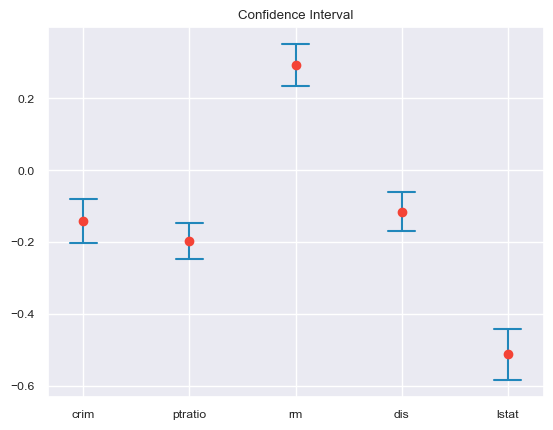

In [319]:
import matplotlib.pyplot as plt
import statistics
from math import sqrt

summary2_df = est2.summary2().tables[1]
intervals_ioc = summary2_df.iloc[1:,[0,4,5]]

def plot_confidence_interval(x, value, color='#2187bb', horizontal_line_width=0.25):
    left = x - horizontal_line_width / 2
    top = value[2]
    right = x + horizontal_line_width / 2
    bottom = value[1]
    plt.plot([x, x], [top, bottom], color=color)
    plt.plot([left, right], [top, top], color=color)
    plt.plot([left, right], [bottom, bottom], color=color)
    plt.plot(x, value[0], 'o', color='#f44336')

    return value[0], abs(value[1]-value[0])

ticks = range(0,len(selectedFeatures),1)
plt.xticks(ticks, selectedFeatures)
plt.title('Confidence Interval')
for tick in ticks:
    plot_confidence_interval(tick, intervals_ioc.iloc[tick,])

plt.show()
